In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.classifier import ConfusionMatrix
from sklearn.model_selection import train_test_split
from sklearn import preprocessing,metrics
plt.style.use('seaborn-v0_8')
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)


# Reading the Dataset and Doing Initial Analysis

In [118]:
data = pd.read_csv('/kaggle/input/cancer-data/Cancer_Data.csv')
df = pd.DataFrame(data)
df

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
0           0.2419                 0.07871     1.0950      0.9053   
1           0.1812                 0.05667     0.5435      0.7339   
2           0.2069                 0.05999     0.7456      0.7869   
3           0.2597                 0.09744     0.4956      1.1560   
4           0.1809                 0.05883     0.7572      0.7813   
..             ...                     ...        ...         ...   
564         0.1726                 0.05623     1.1760      1.2560   
565         0.1752                 0.05533     0.7655      2.4630   
566         0.1590                 0.05648     0.4564      1.0750   
567         0.2397                 0.07016     0.7260      1.5950   
568         0.1587                 0.05884     0.3857      1.4280   

     perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  \
0           8.589   153.40       0.006399         0.04904       0.05373   
1           3.398    74.08       0.005225         0.01308       0.01860   
2           4.585    94.03       0.006150         0.04006       0.03832   
3           3.445    27.23       0.009110         0.07458       0.05661   
4           5.438    94.44       0.011490         0.02461       0.05688   
..            ...      ...            ...             ...           ...   
564         7.673   158.70       0.010300         0.02891       0.05198   
565         5.203    99.04       0.005769         0.02423       0.03950   
566         3.425    48.55       0.005903         0.03731       0.04730   
567         5.772    86.22       0.006522         0.06158       0.07117   
568         2.548    19.15       0.007189         0.00466       0.00000   

     concave points_se  symmetry_se  fractal_dimension_se  radius_worst  \
0              0.01587      0.03003              0.006193        25.380   
1              0.01340      0.01389              0.003532        24.990   
2              0.02058      0.02250              0.004571        23.570   
3              0.01867      0.05963              0.009208  

In [119]:
df = df.drop(columns = ['id','Unnamed: 32'])
df

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           M        17.99         10.38          122.80     1001.0   
1           M        20.57         17.77          132.90     1326.0   
2           M        19.69         21.25          130.00     1203.0   
3           M        11.42         20.38           77.58      386.1   
4           M        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564         M        21.56         22.39          142.00     1479.0   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   
568         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
0           0.2419                 0.07871     1.0950      0.9053   
1           0.1812                 0.05667     0.5435      0.7339   
2           0.2069                 0.05999     0.7456      0.7869   
3           0.2597                 0.09744     0.4956      1.1560   
4           0.1809                 0.05883     0.7572      0.7813   
..             ...                     ...        ...         ...   
564         0.1726                 0.05623     1.1760      1.2560   
565         0.1752                 0.05533     0.7655      2.4630   
566         0.1590                 0.05648     0.4564      1.0750   
567         0.2397                 0.07016     0.7260      1.5950   
568         0.1587                 0.05884     0.3857      1.4280   

     perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  \
0           8.589   153.40       0.006399         0.04904       0.05373   
1           3.398    74.08       0.005225         0.01308       0.01860   
2           4.585    94.03       0.006150         0.04006       0.03832   
3           3.445    27.23       0.009110         0.07458       0.05661   
4           5.438    94.44       0.011490         0.02461       0.05688   
..            ...      ...            ...             ...           ...   
564         7.673   158.70       0.010300         0.02891       0.05198   
565         5.203    99.04       0.005769         0.02423       0.03950   
566         3.425    48.55       0.005903         0.03731       0.04730   
567         5.772    86.22       0.006522         0.06158       0.07117   
568         2.548    19.15       0.007189         0.00466       0.00000   

     concave points_se  symmetry_se  fractal_dimension_se  radius_worst  \
0              0.01587      0.03003              0.006193        25.380   
1              0.01340      0.01389              0.003532        24.990   
2              0.02058      0.02250              0.004571        23.570   
3              0.01867      0.05963              0.009208        14.910   
4              0.01885      0.01756              0.005115        22.540   
..                 ...

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [121]:
df.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean   radius_se  texture_se  \
count     569.000000              569.000000  569.000000  569.000000   
mean        0.181162                0.062798    0.405172    1.216853   
std         0.027414                0.007060    0.277313    0.551648   
min         0.106000                0.049960    0.111500    0.360200   
25%         0.161900                0.057700    0.232400    0.833900   
50%         0.179200                0.061540    0.324200    1.108000   
75%         0.195700                0.066120    0.478900    1.474000   
max         0.304000                0.097440    2.873000    4.885000   

       perimeter_se     area_se  smoothness_se  compactness_se  concavity_se  \
count    569.000000  569.000000     569.000000      569.000000    569.000000   
mean       2.866059   40.337079       0.007041        0.025478      0.031894   
std        2.021855   45.491006       0.003003        0.017908      0.030186   
min        0.757000    6.802000       0.001713        0.002252      0.000000   
25%        1.606000   17.850000       0.005169        0.013080      0.015090   
50%        2.287000   24.530000       0.006380        0.020450      0.025890   
75%        3.357000   45.190000       0.008146        0.032450      0.042050   
max       21.980000  542.200000       0.031130        0.135400      0.396000   

       concave points_se  symmetry_se  fractal_dimension_se  radius_worst  \
count         569.000000   569.000000            569.000000    569.000000   
mean            0.011796     0.020542              0.003795     16.269190   
std             0.006170     0.008266              0.002646      4.833242   
min             0.000000     0.007882              0.000895      7.930000   
25%             0.007638     0.015160              0.002248     13.010000   
50%             0.010930     0.018730              0.003187     14.970000   
75%             0.014710     0.023480              0.004558     18.790000   
max             0.052790     0.078950              0.029840     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000 

> **Dividing the dataset into 3 datasets for easier analysis**

In [122]:
df_viz1 = df.iloc[:,1:11]
df_viz2 = df.iloc[:,11:21]
df_viz3 = df.iloc[:,21:-1]
df_viz1['diagnosis'] = df.diagnosis
df_viz2['diagnosis'] = df.diagnosis
df_viz3['diagnosis'] = df.diagnosis

# Analyis on the first part

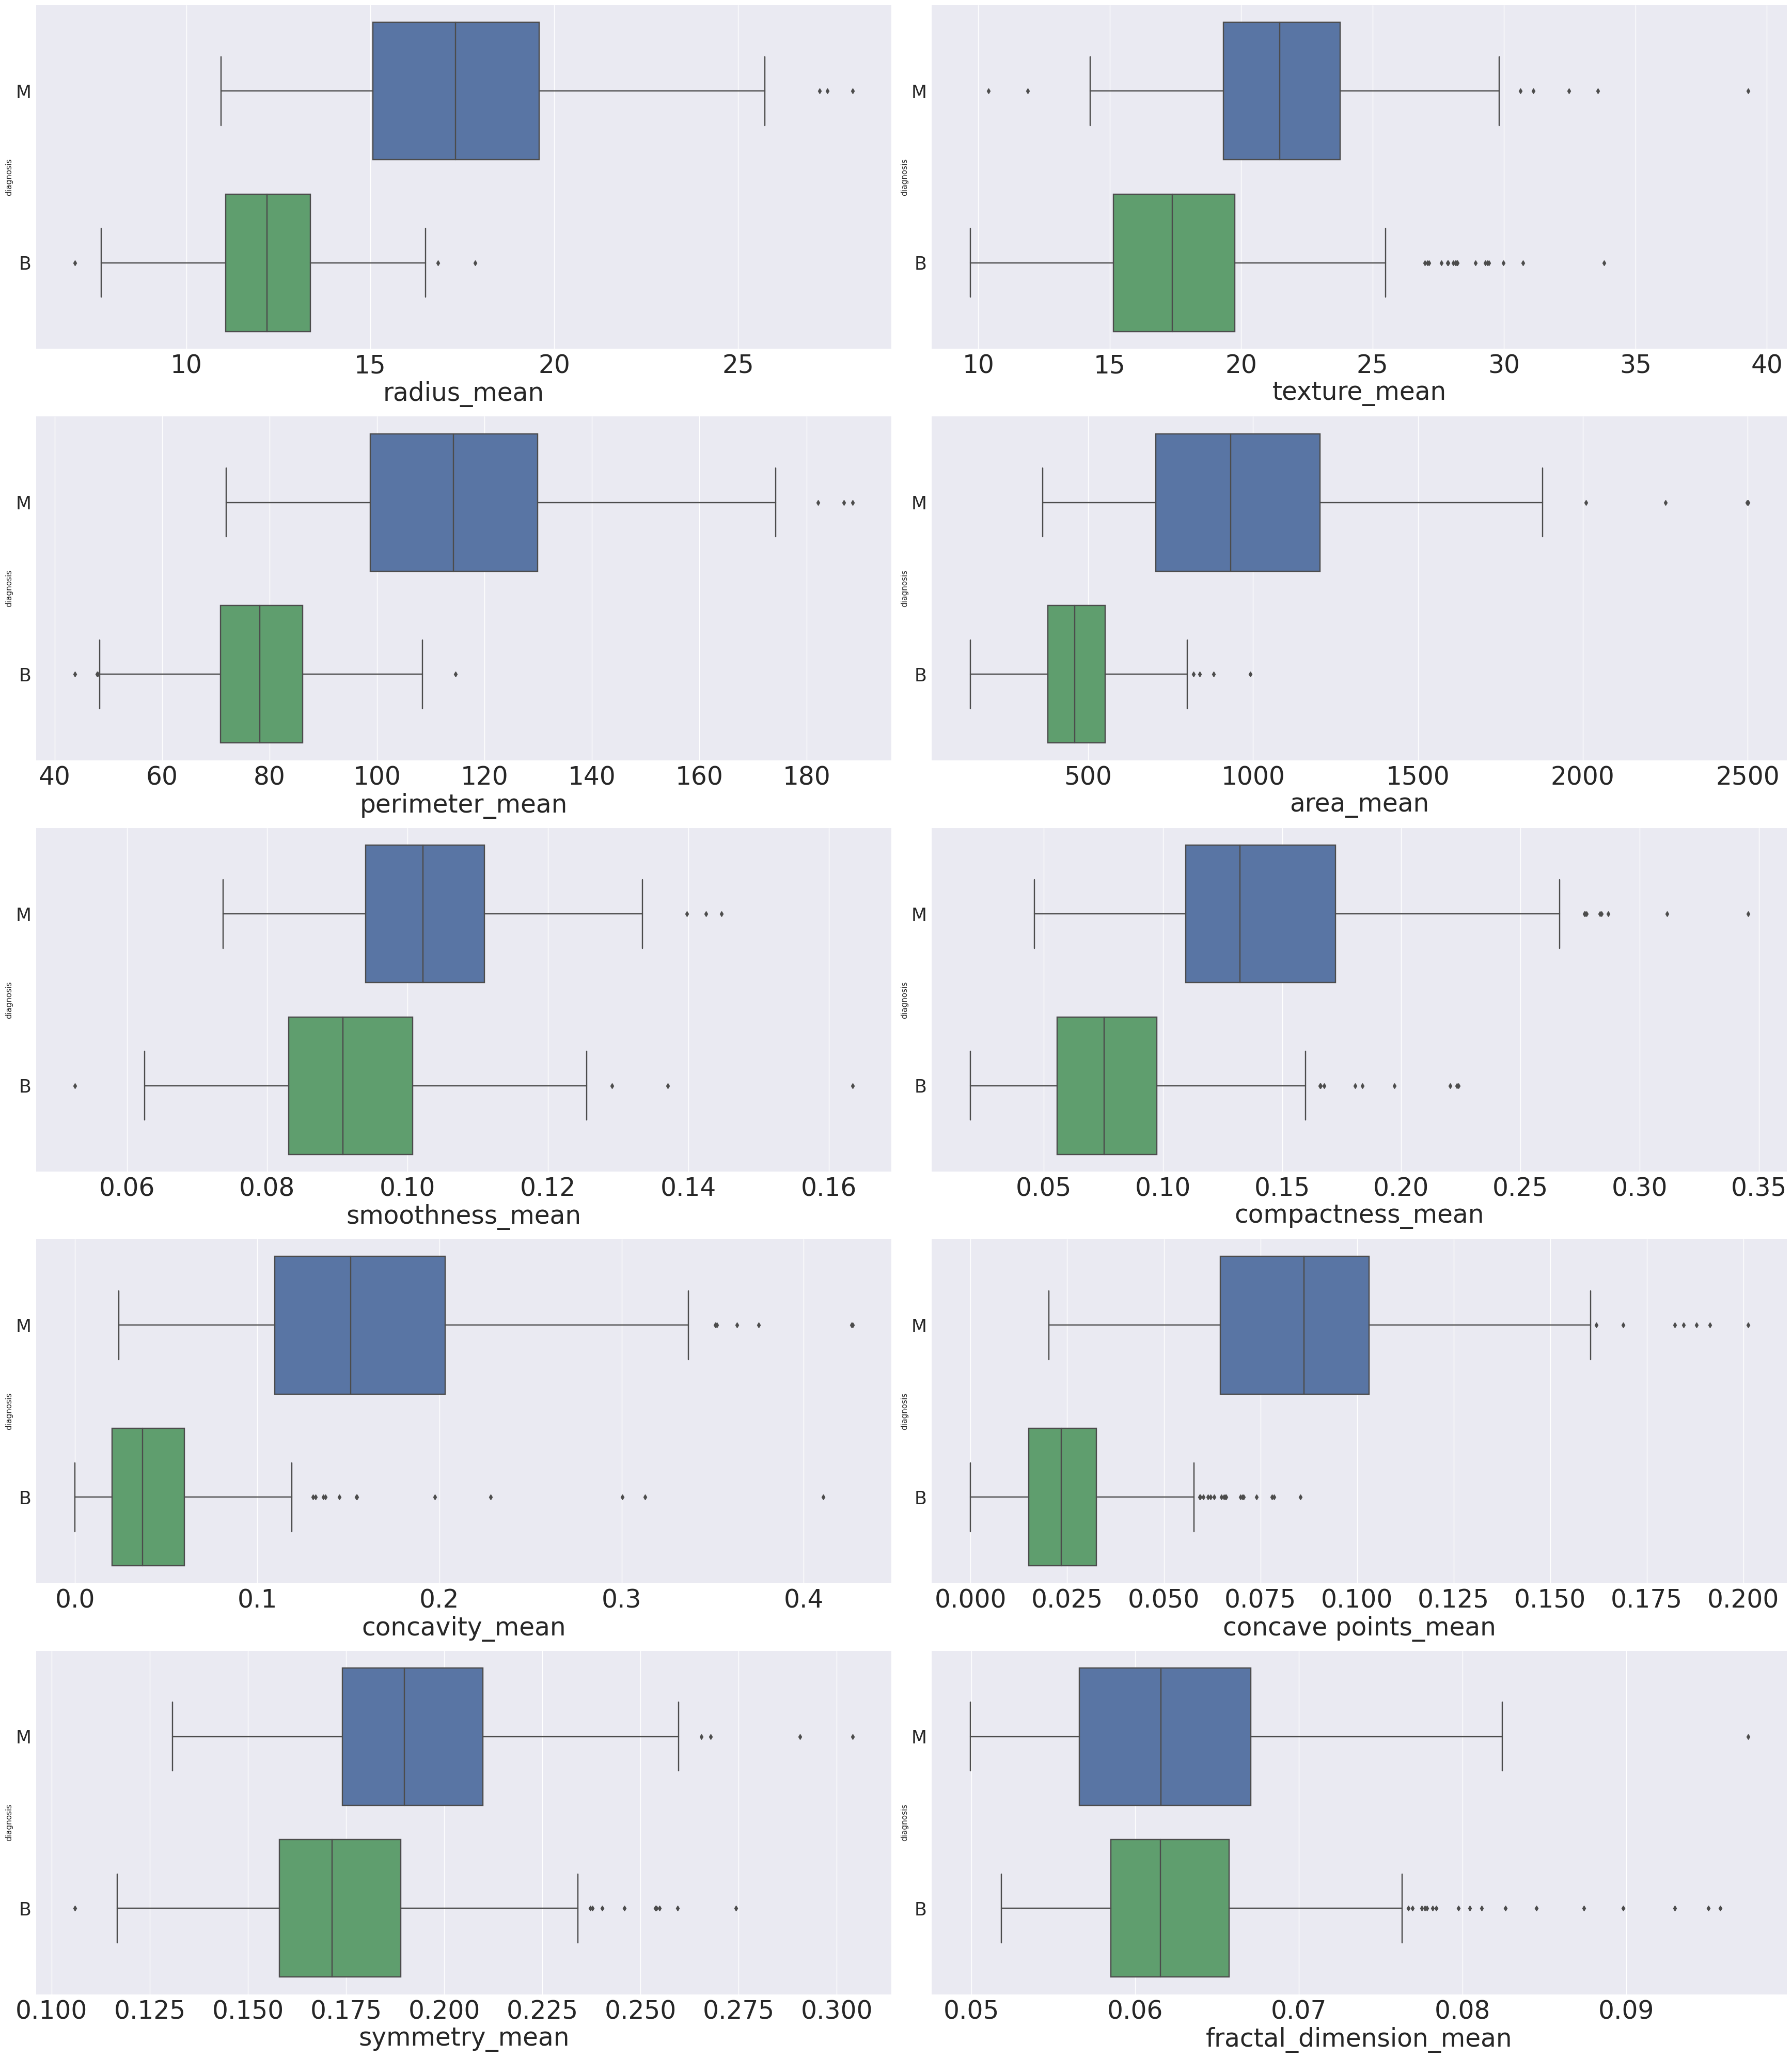

In [123]:
fig,axs = plt.subplots(ncols =2 ,nrows =5 ,figsize = (35,40),dpi= 100)
axs = axs.flatten()
for i,col in enumerate(df_viz1.drop(columns = 'diagnosis').columns) :
    sns.boxplot(x = col,y='diagnosis',data = df_viz1 , ax=axs[i])
    axs[i].set_xlabel(col,fontsize=35)
    axs[i].tick_params(axis= 'x',labelsize = 35)
    axs[i].tick_params(axis= 'y',labelsize = 25)
    
plt.tight_layout()
plt.show()

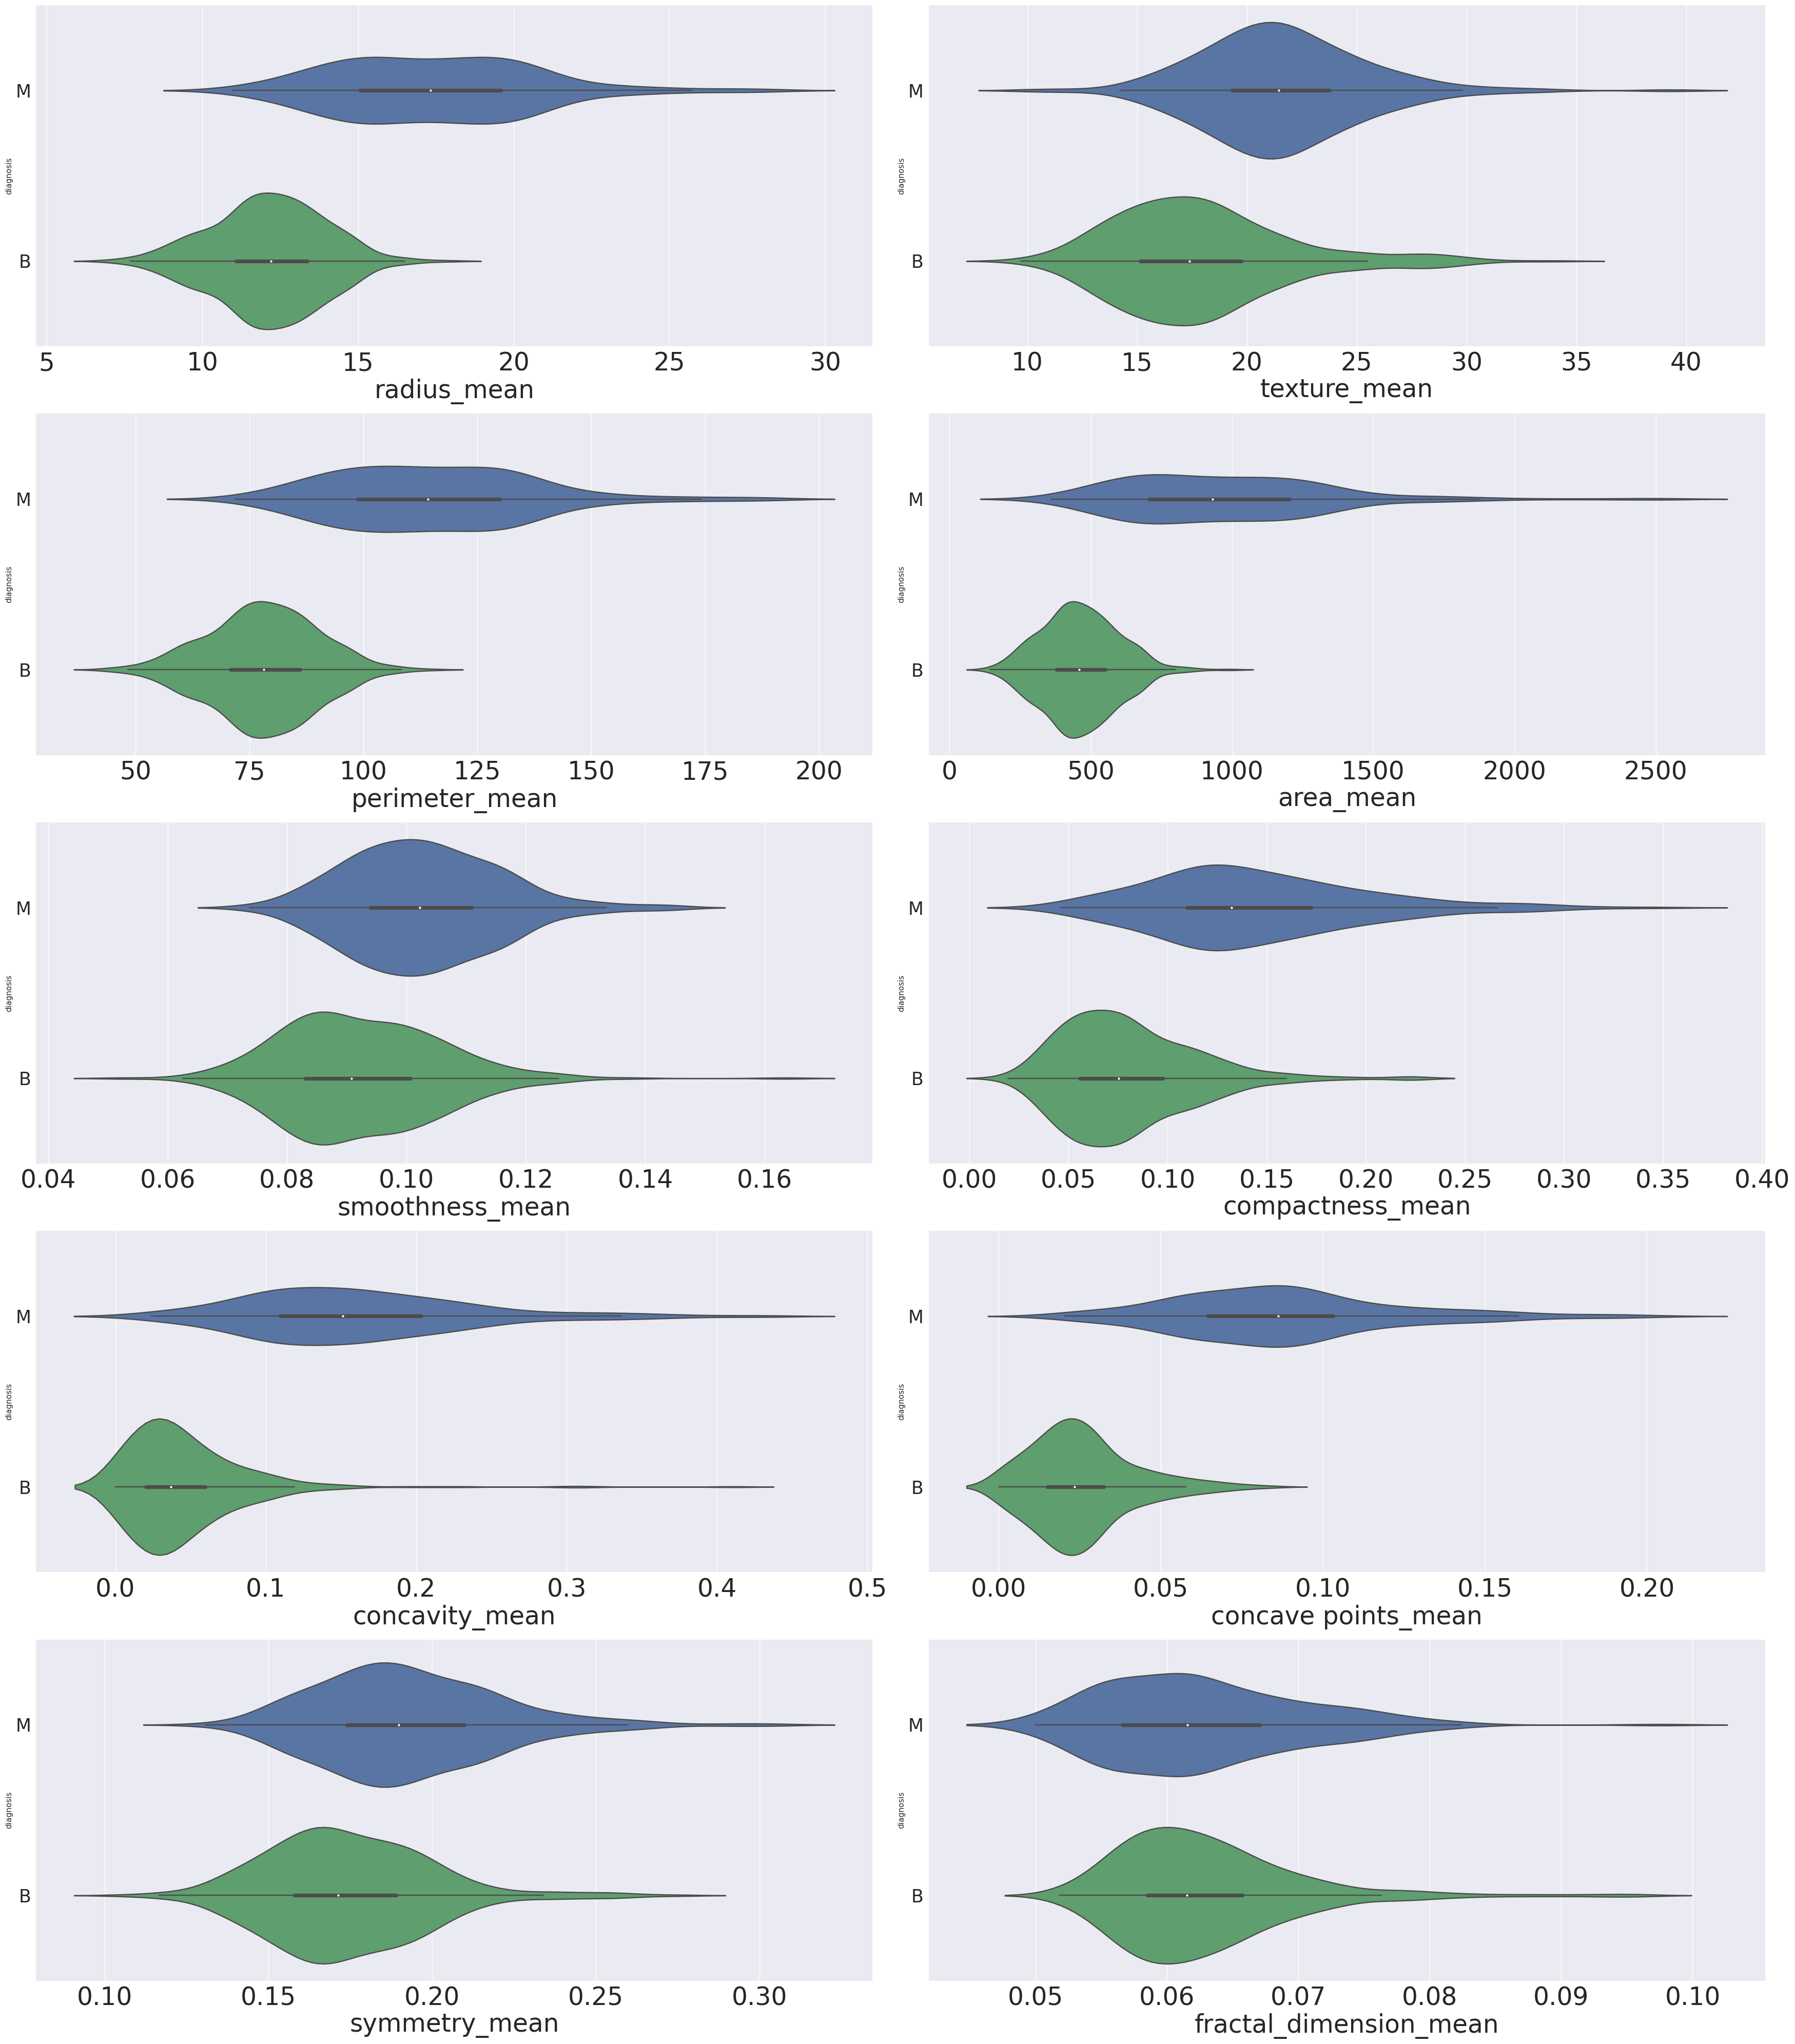

In [124]:
fig,axs = plt.subplots(ncols =2 ,nrows =5 ,figsize = (35,40),dpi= 100)
axs = axs.flatten()
for i,col in enumerate(df_viz1.drop(columns = 'diagnosis').columns) :
    sns.violinplot(x = col,y='diagnosis',data = df_viz1, ax=axs[i])
    axs[i].set_xlabel(col,fontsize=35)
    axs[i].tick_params(axis= 'x',labelsize = 35)
    axs[i].tick_params(axis= 'y',labelsize = 25)
    
plt.tight_layout()
plt.show()

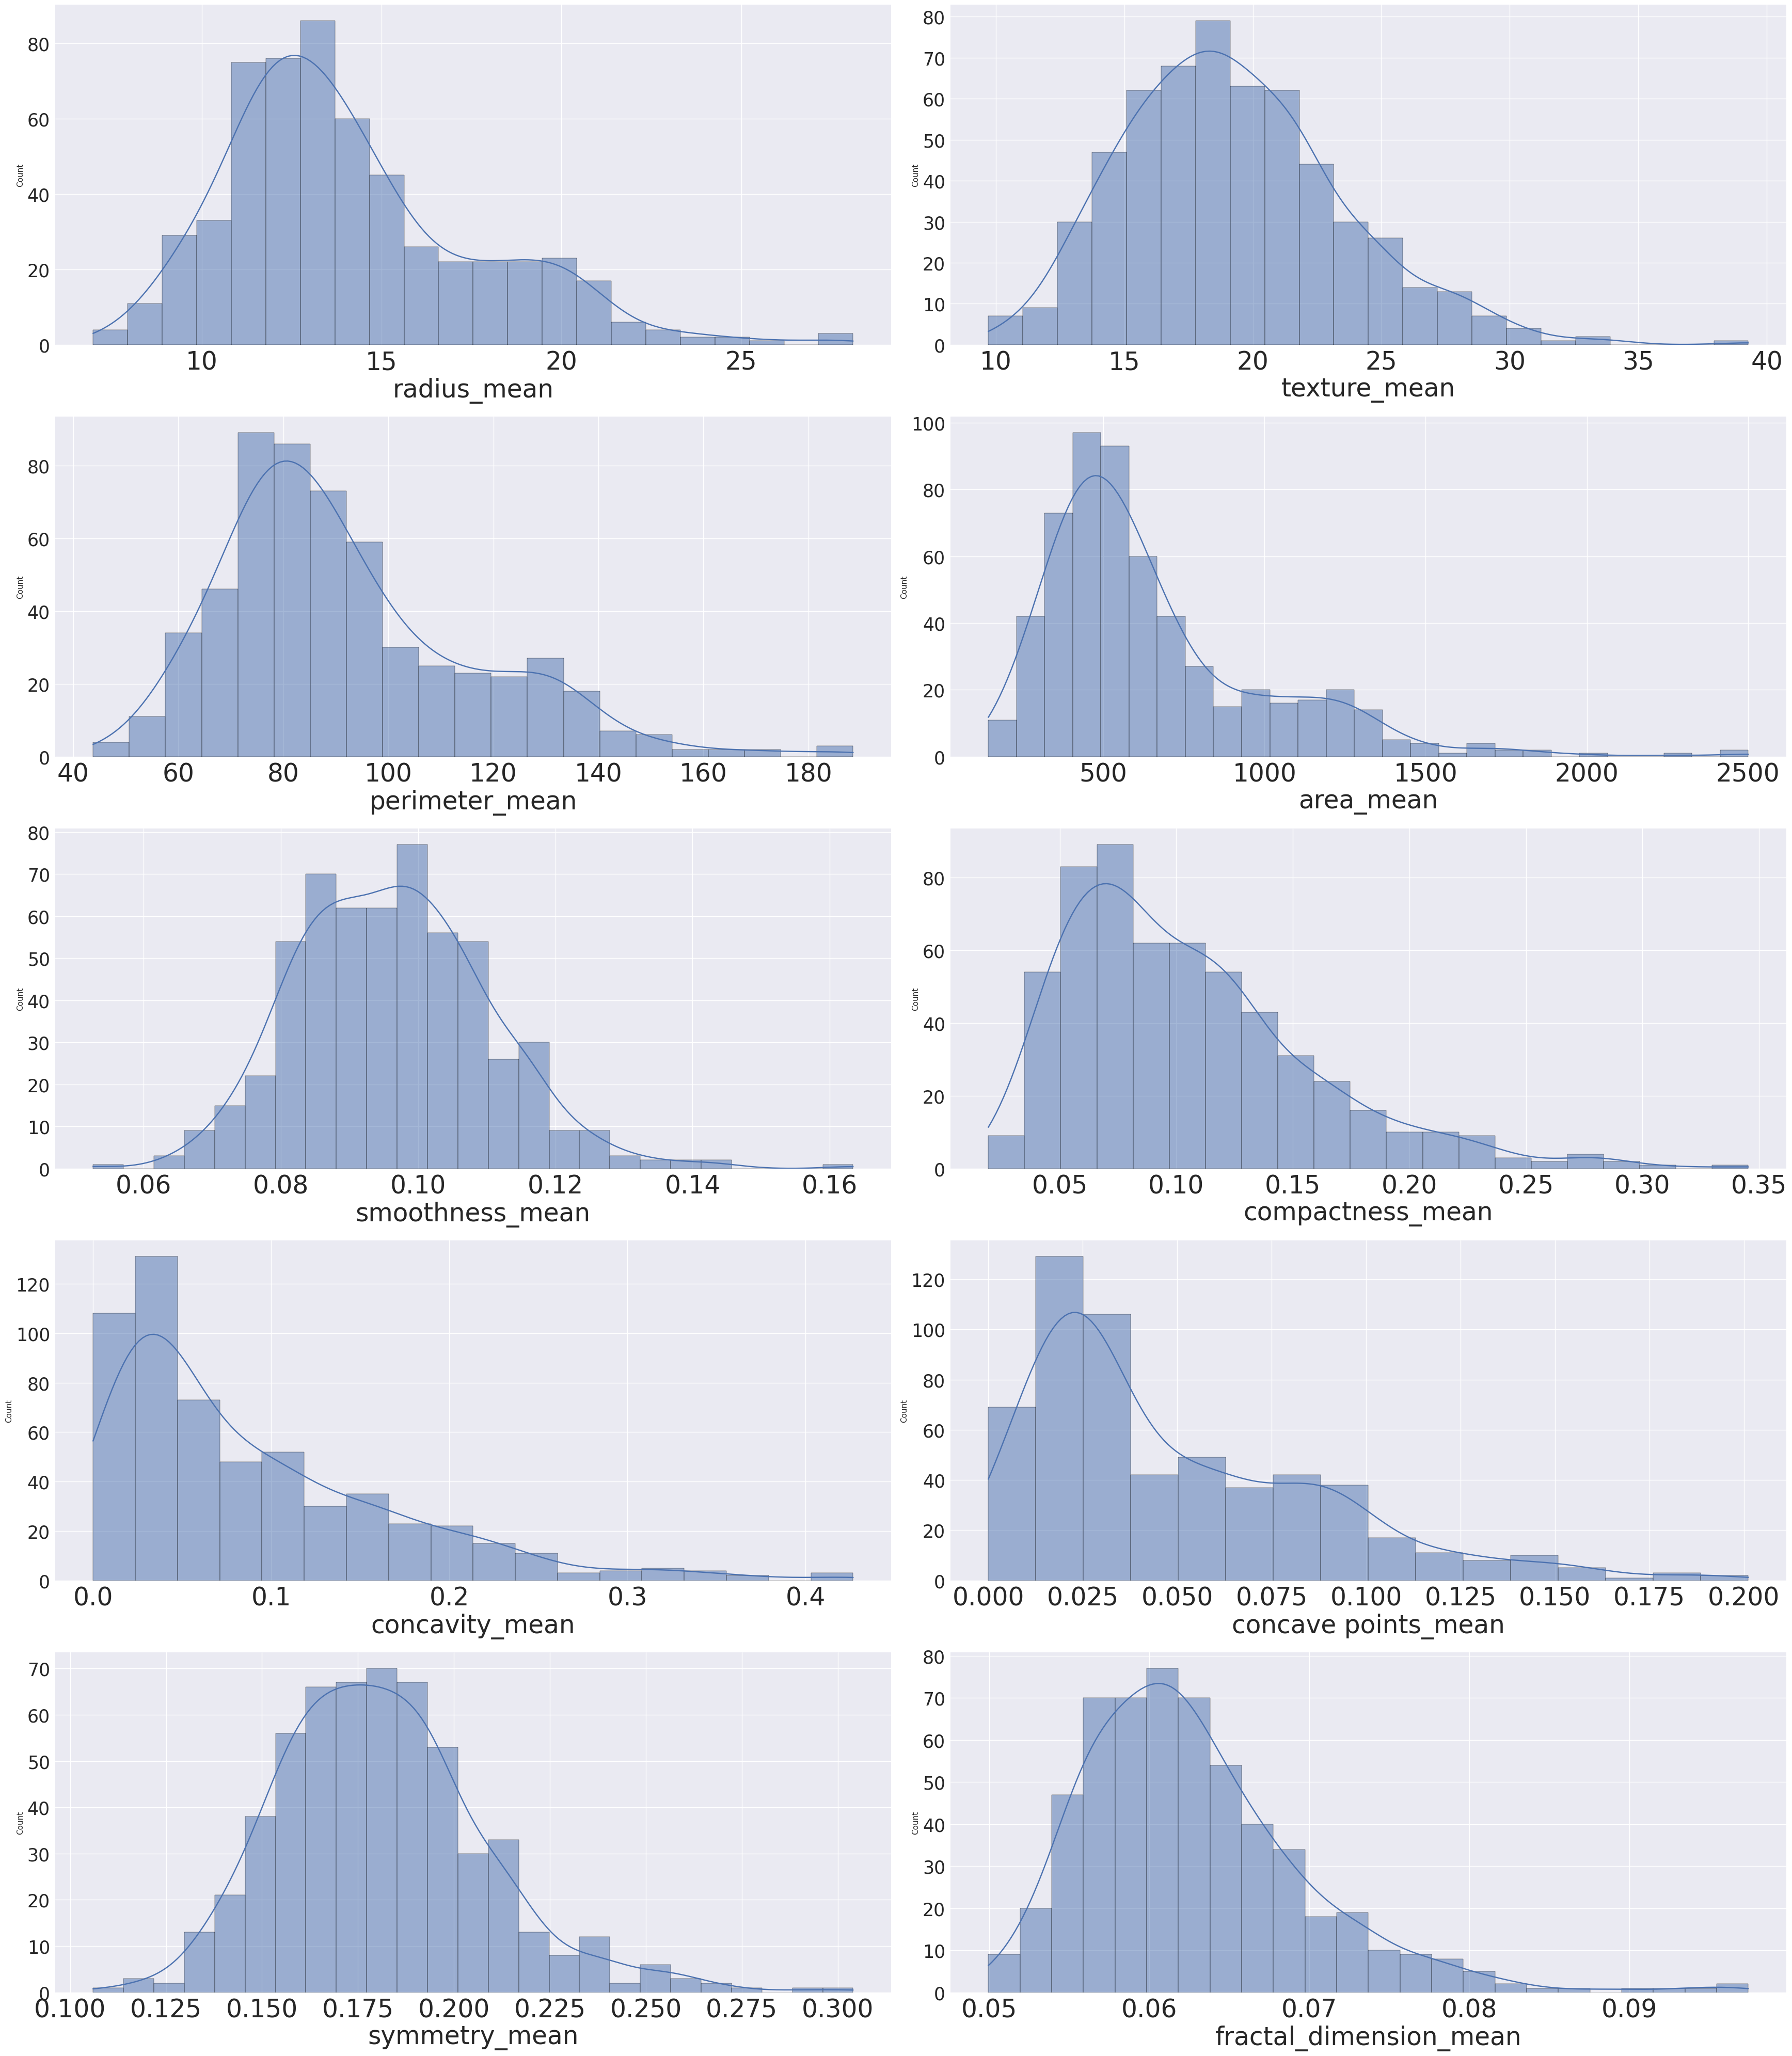

In [125]:
fig,axs = plt.subplots(ncols =2 ,nrows =5 ,figsize = (35,40),dpi= 100)
axs = axs.flatten()
for i,col in enumerate(df_viz1.drop(columns = 'diagnosis').columns) :
    sns.histplot(x = col,data = df_viz1 ,kde=True, ax=axs[i])
    axs[i].set_xlabel(col,fontsize=35)
    axs[i].tick_params(axis= 'x',labelsize = 35)
    axs[i].tick_params(axis= 'y',labelsize = 25)
    
plt.tight_layout()
plt.show()

# Analyis on the second part

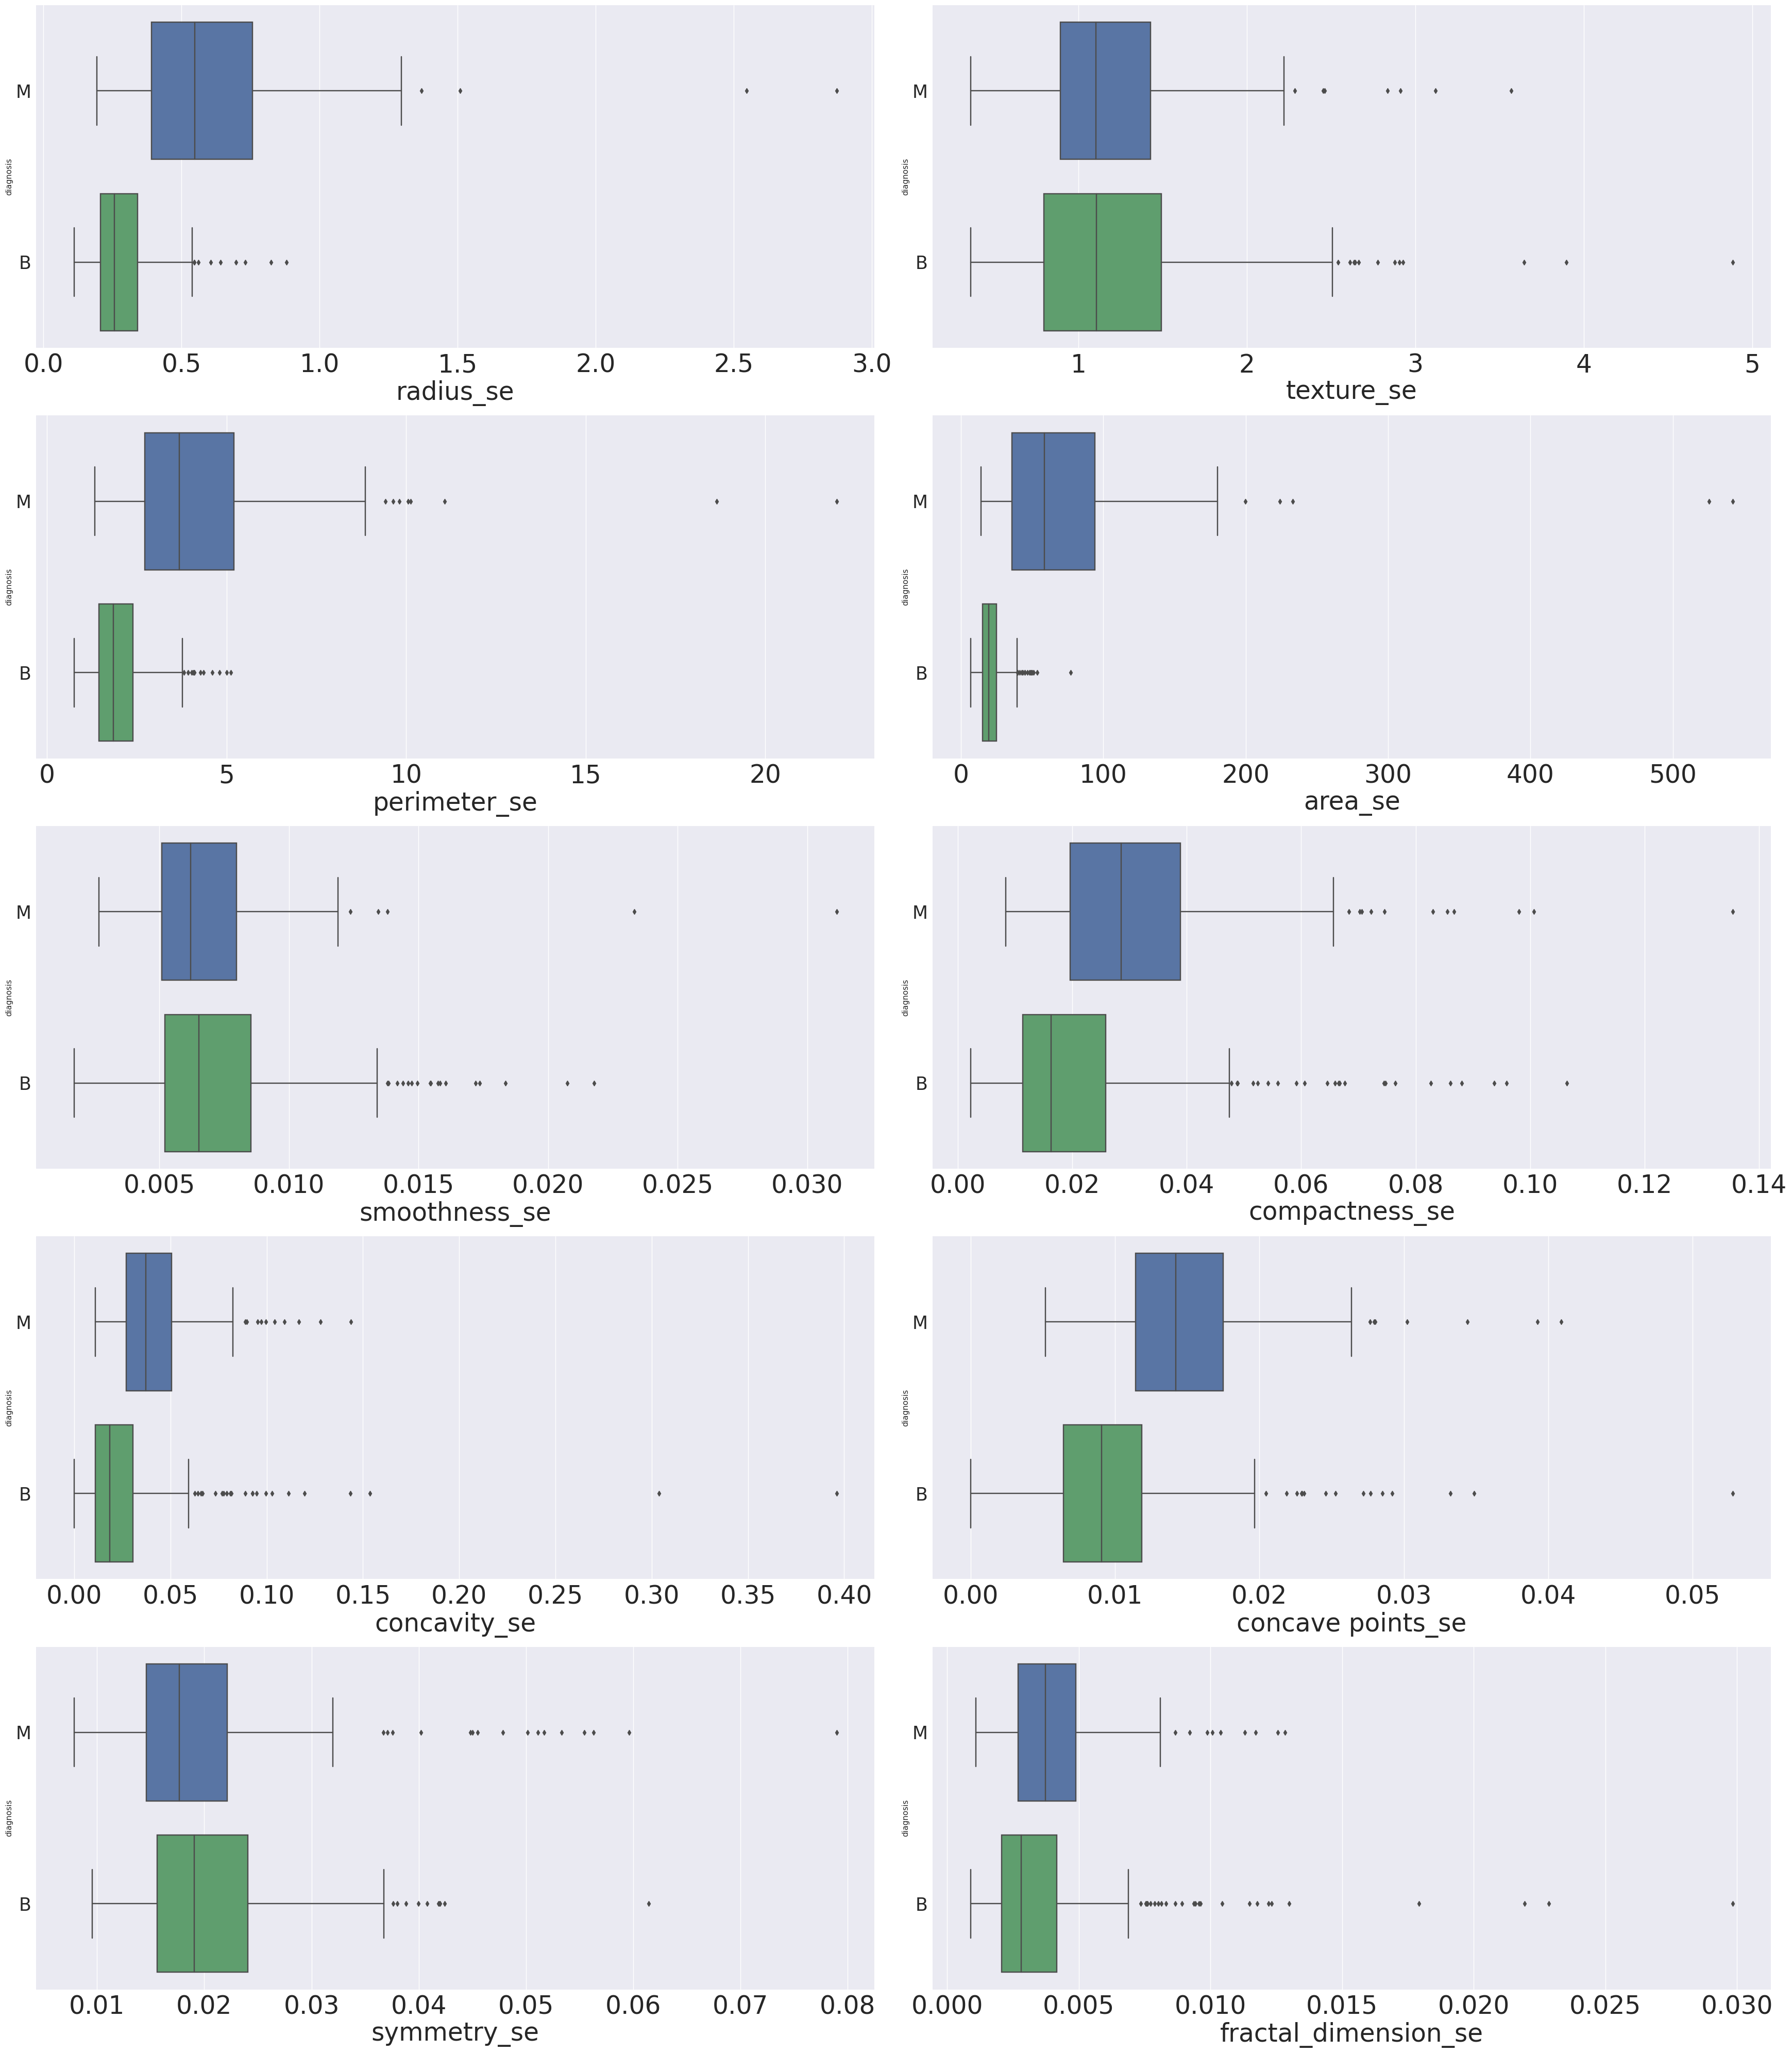

In [126]:
fig,axs = plt.subplots(ncols =2 ,nrows =5 ,figsize = (35,40),dpi= 100)
axs = axs.flatten()
for i,col in enumerate(df_viz2.drop(columns = 'diagnosis').columns) :
    sns.boxplot(x = col,y='diagnosis',data = df_viz2 , ax=axs[i])
    axs[i].set_xlabel(col,fontsize=35)
    axs[i].tick_params(axis= 'x',labelsize = 35)
    axs[i].tick_params(axis= 'y',labelsize = 25)
    
plt.tight_layout()
plt.show()

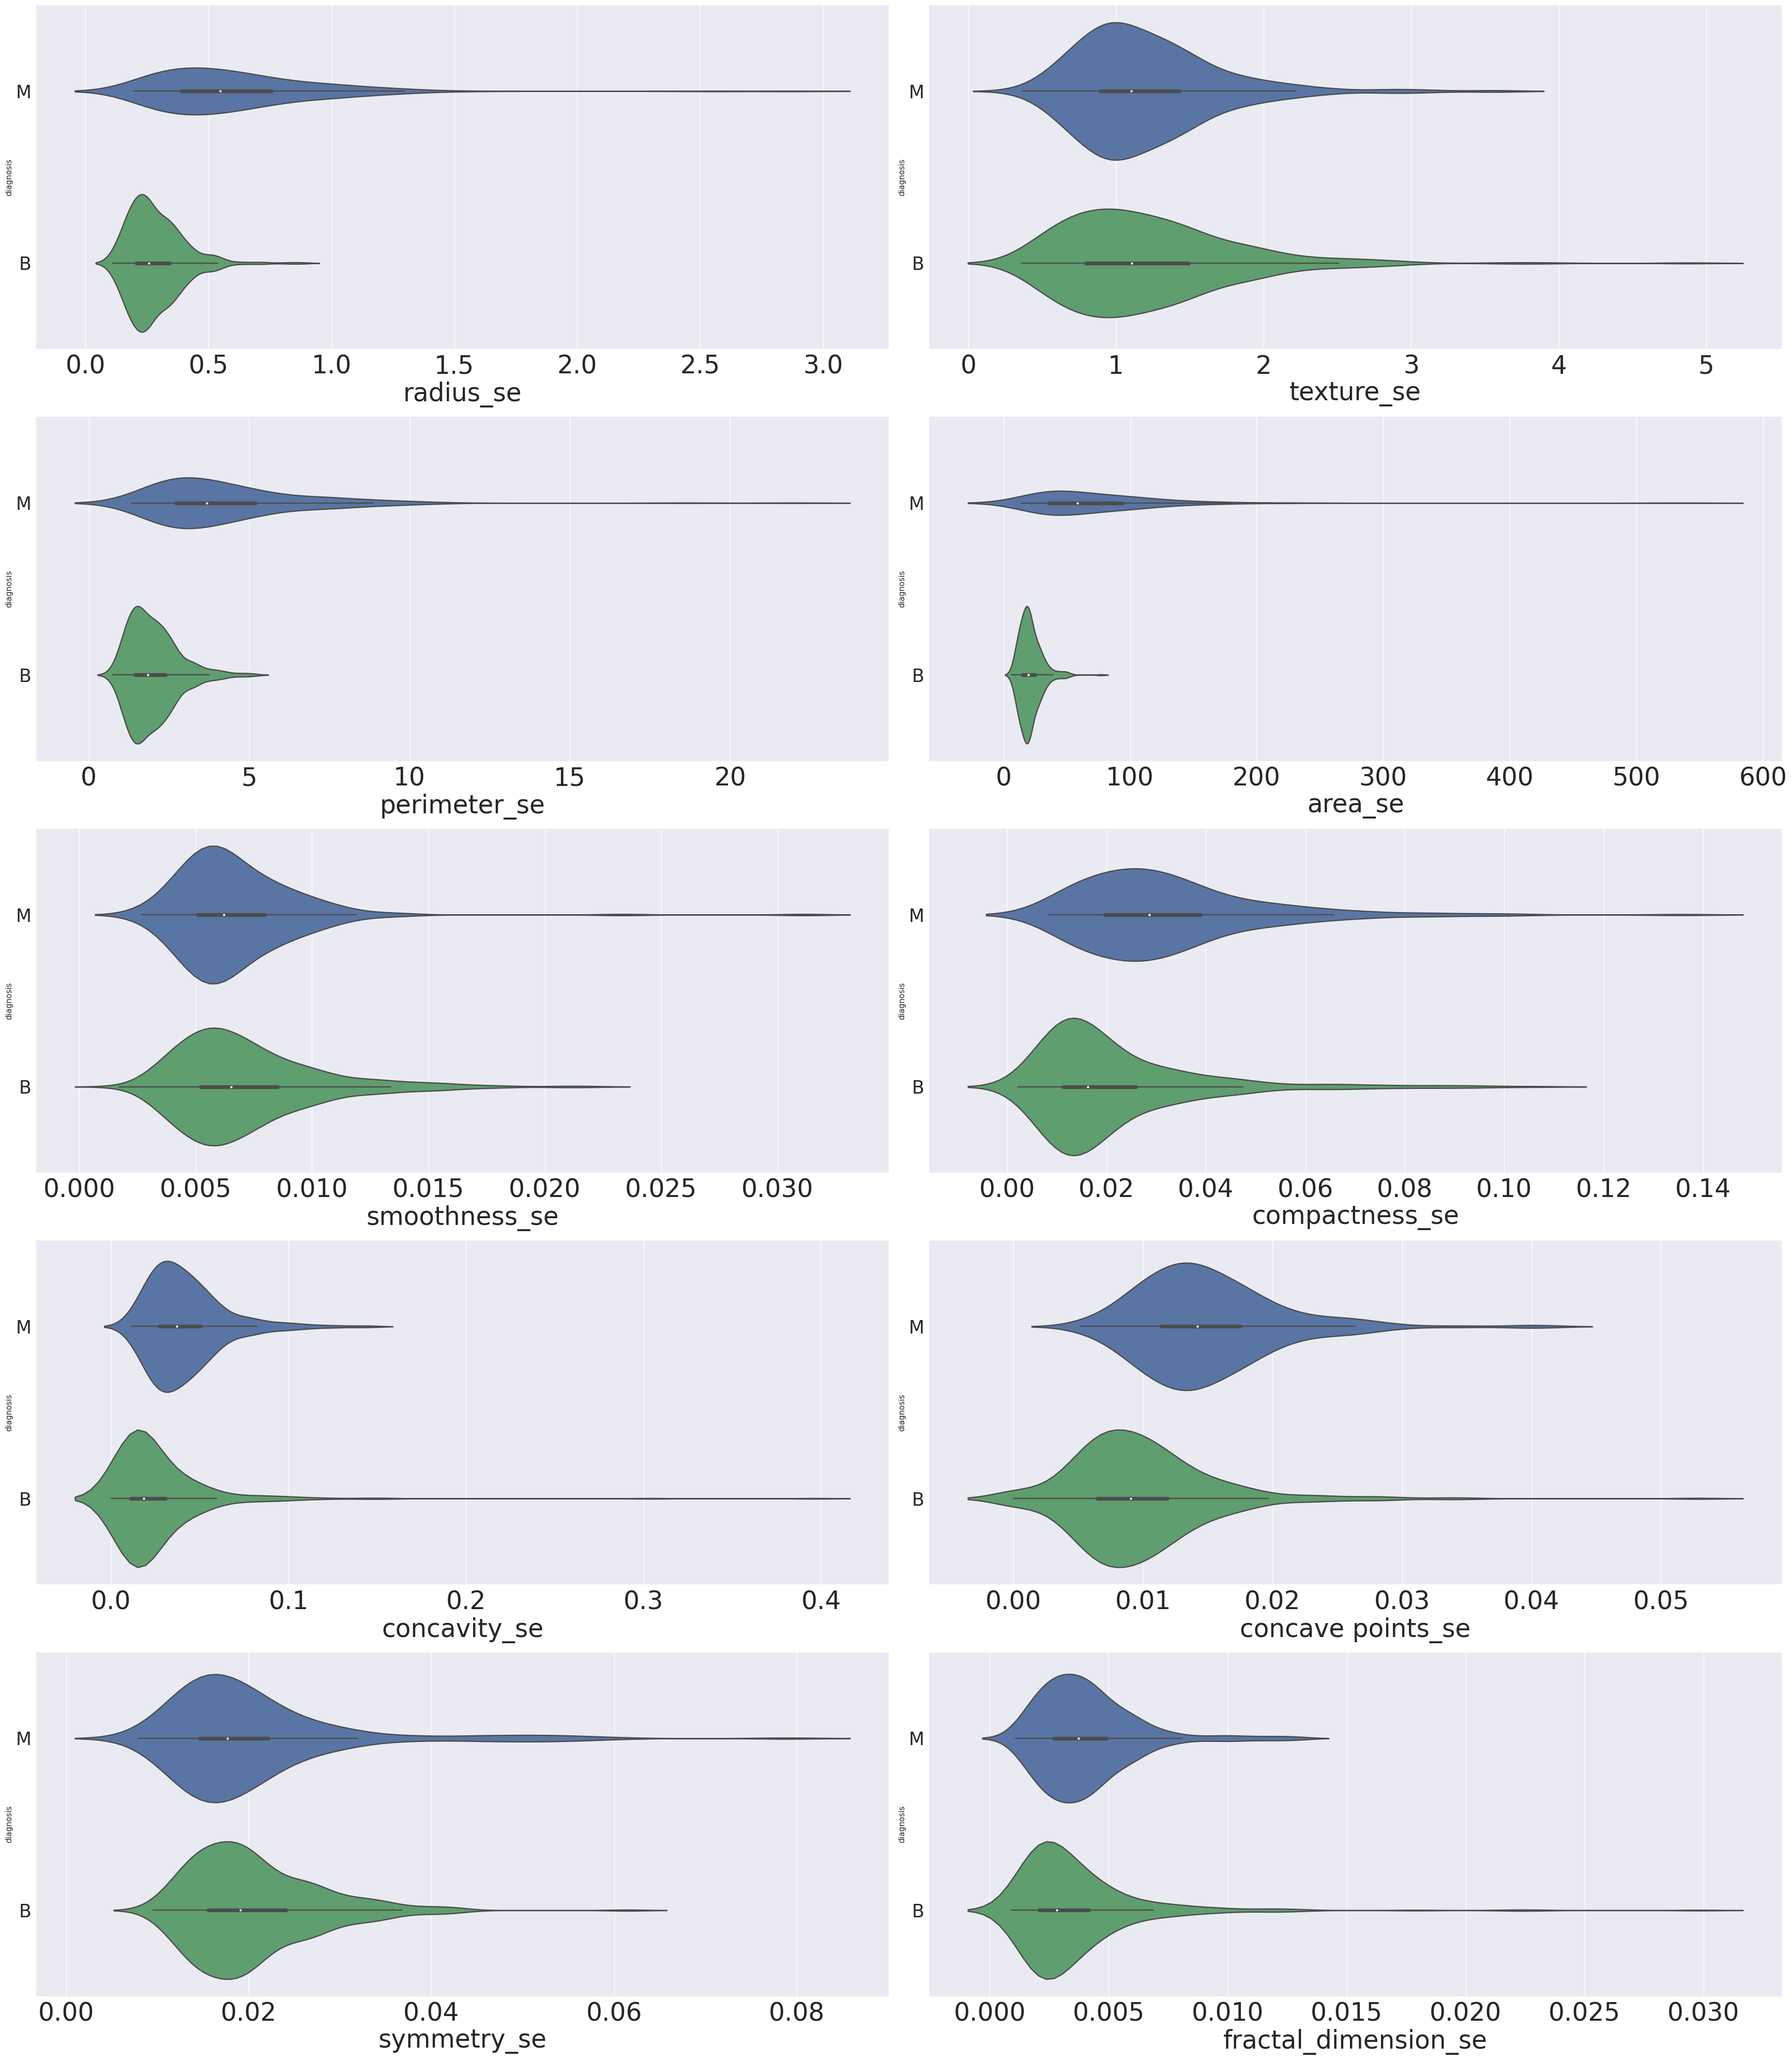

In [127]:
fig,axs = plt.subplots(ncols =2 ,nrows =5 ,figsize = (35,40),dpi= 100)
axs = axs.flatten()
for i,col in enumerate(df_viz2.drop(columns = 'diagnosis').columns) :
    sns.violinplot(x = col,y='diagnosis',data = df_viz2, ax=axs[i])
    axs[i].set_xlabel(col,fontsize=35)
    axs[i].tick_params(axis= 'x',labelsize = 35)
    axs[i].tick_params(axis= 'y',labelsize = 25)
    
plt.tight_layout()
plt.show()

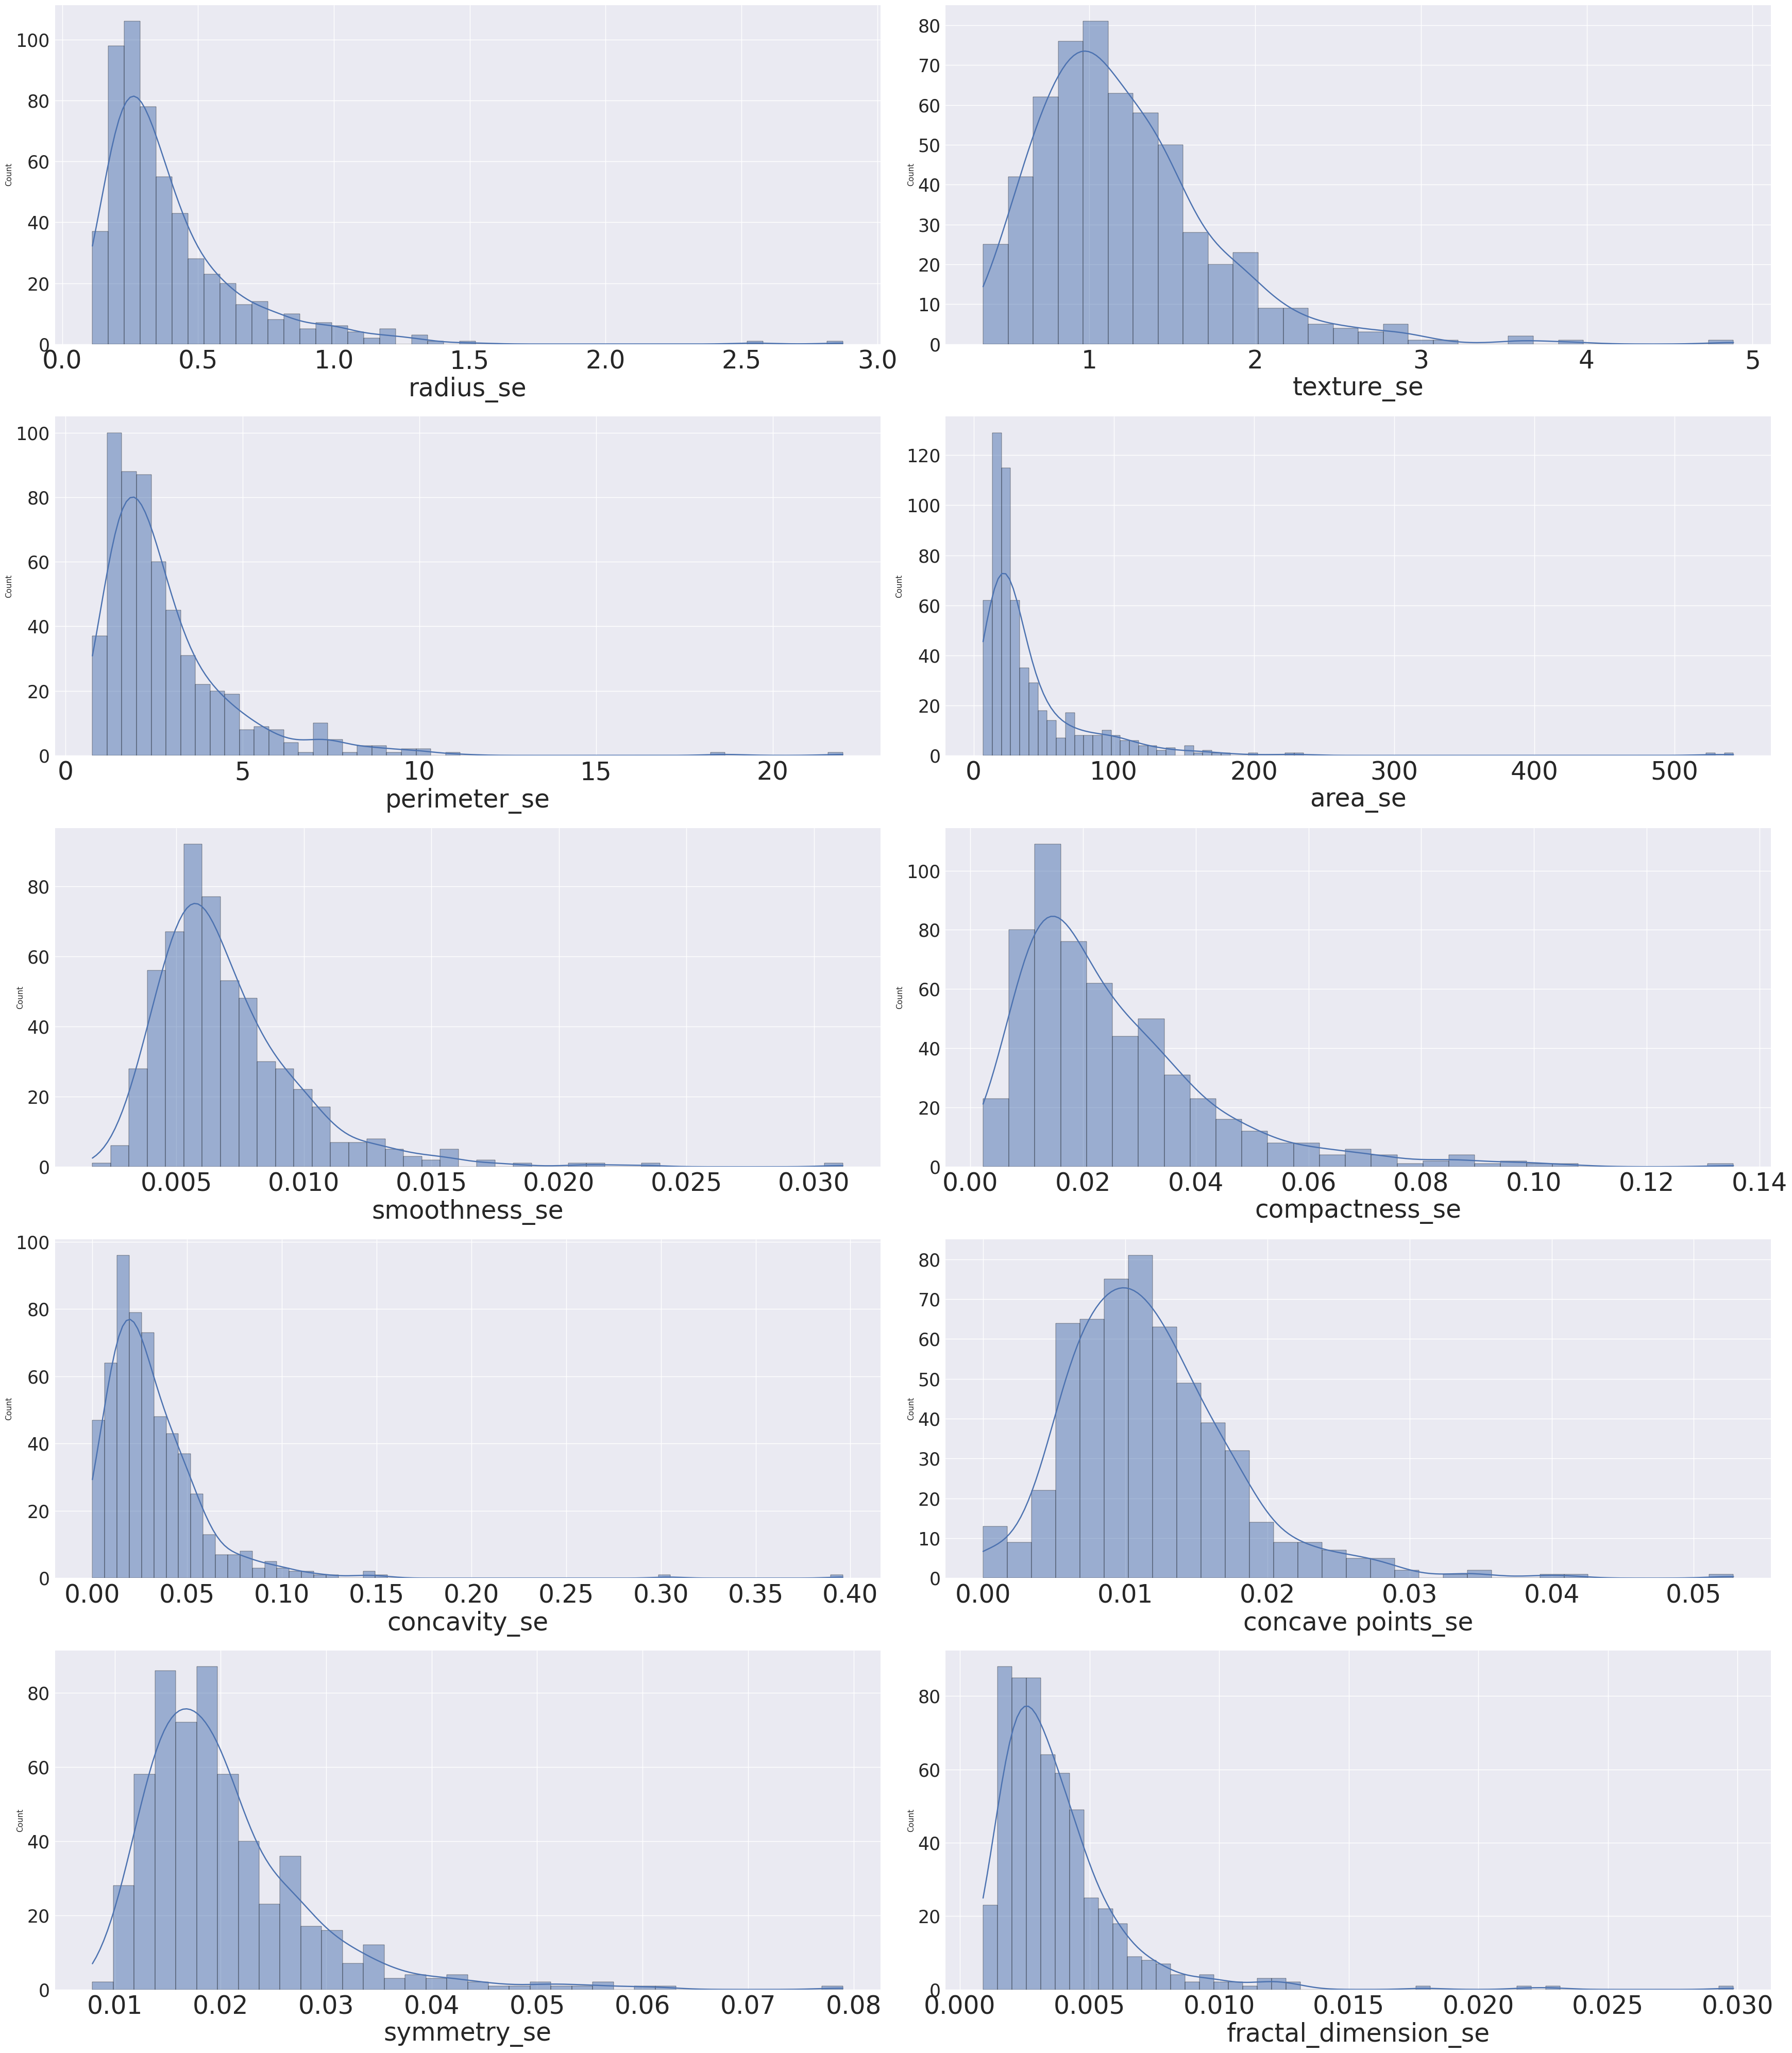

In [128]:
fig,axs = plt.subplots(ncols =2 ,nrows =5 ,figsize = (35,40),dpi= 100)
axs = axs.flatten()
for i,col in enumerate(df_viz2.drop(columns = 'diagnosis').columns) :
    sns.histplot(x = col,data = df_viz2,kde=True, ax=axs[i])
    axs[i].set_xlabel(col,fontsize=35)
    axs[i].tick_params(axis= 'x',labelsize = 35)
    axs[i].tick_params(axis= 'y',labelsize = 25)
    
plt.tight_layout()
plt.show()

# Analyis on the third part

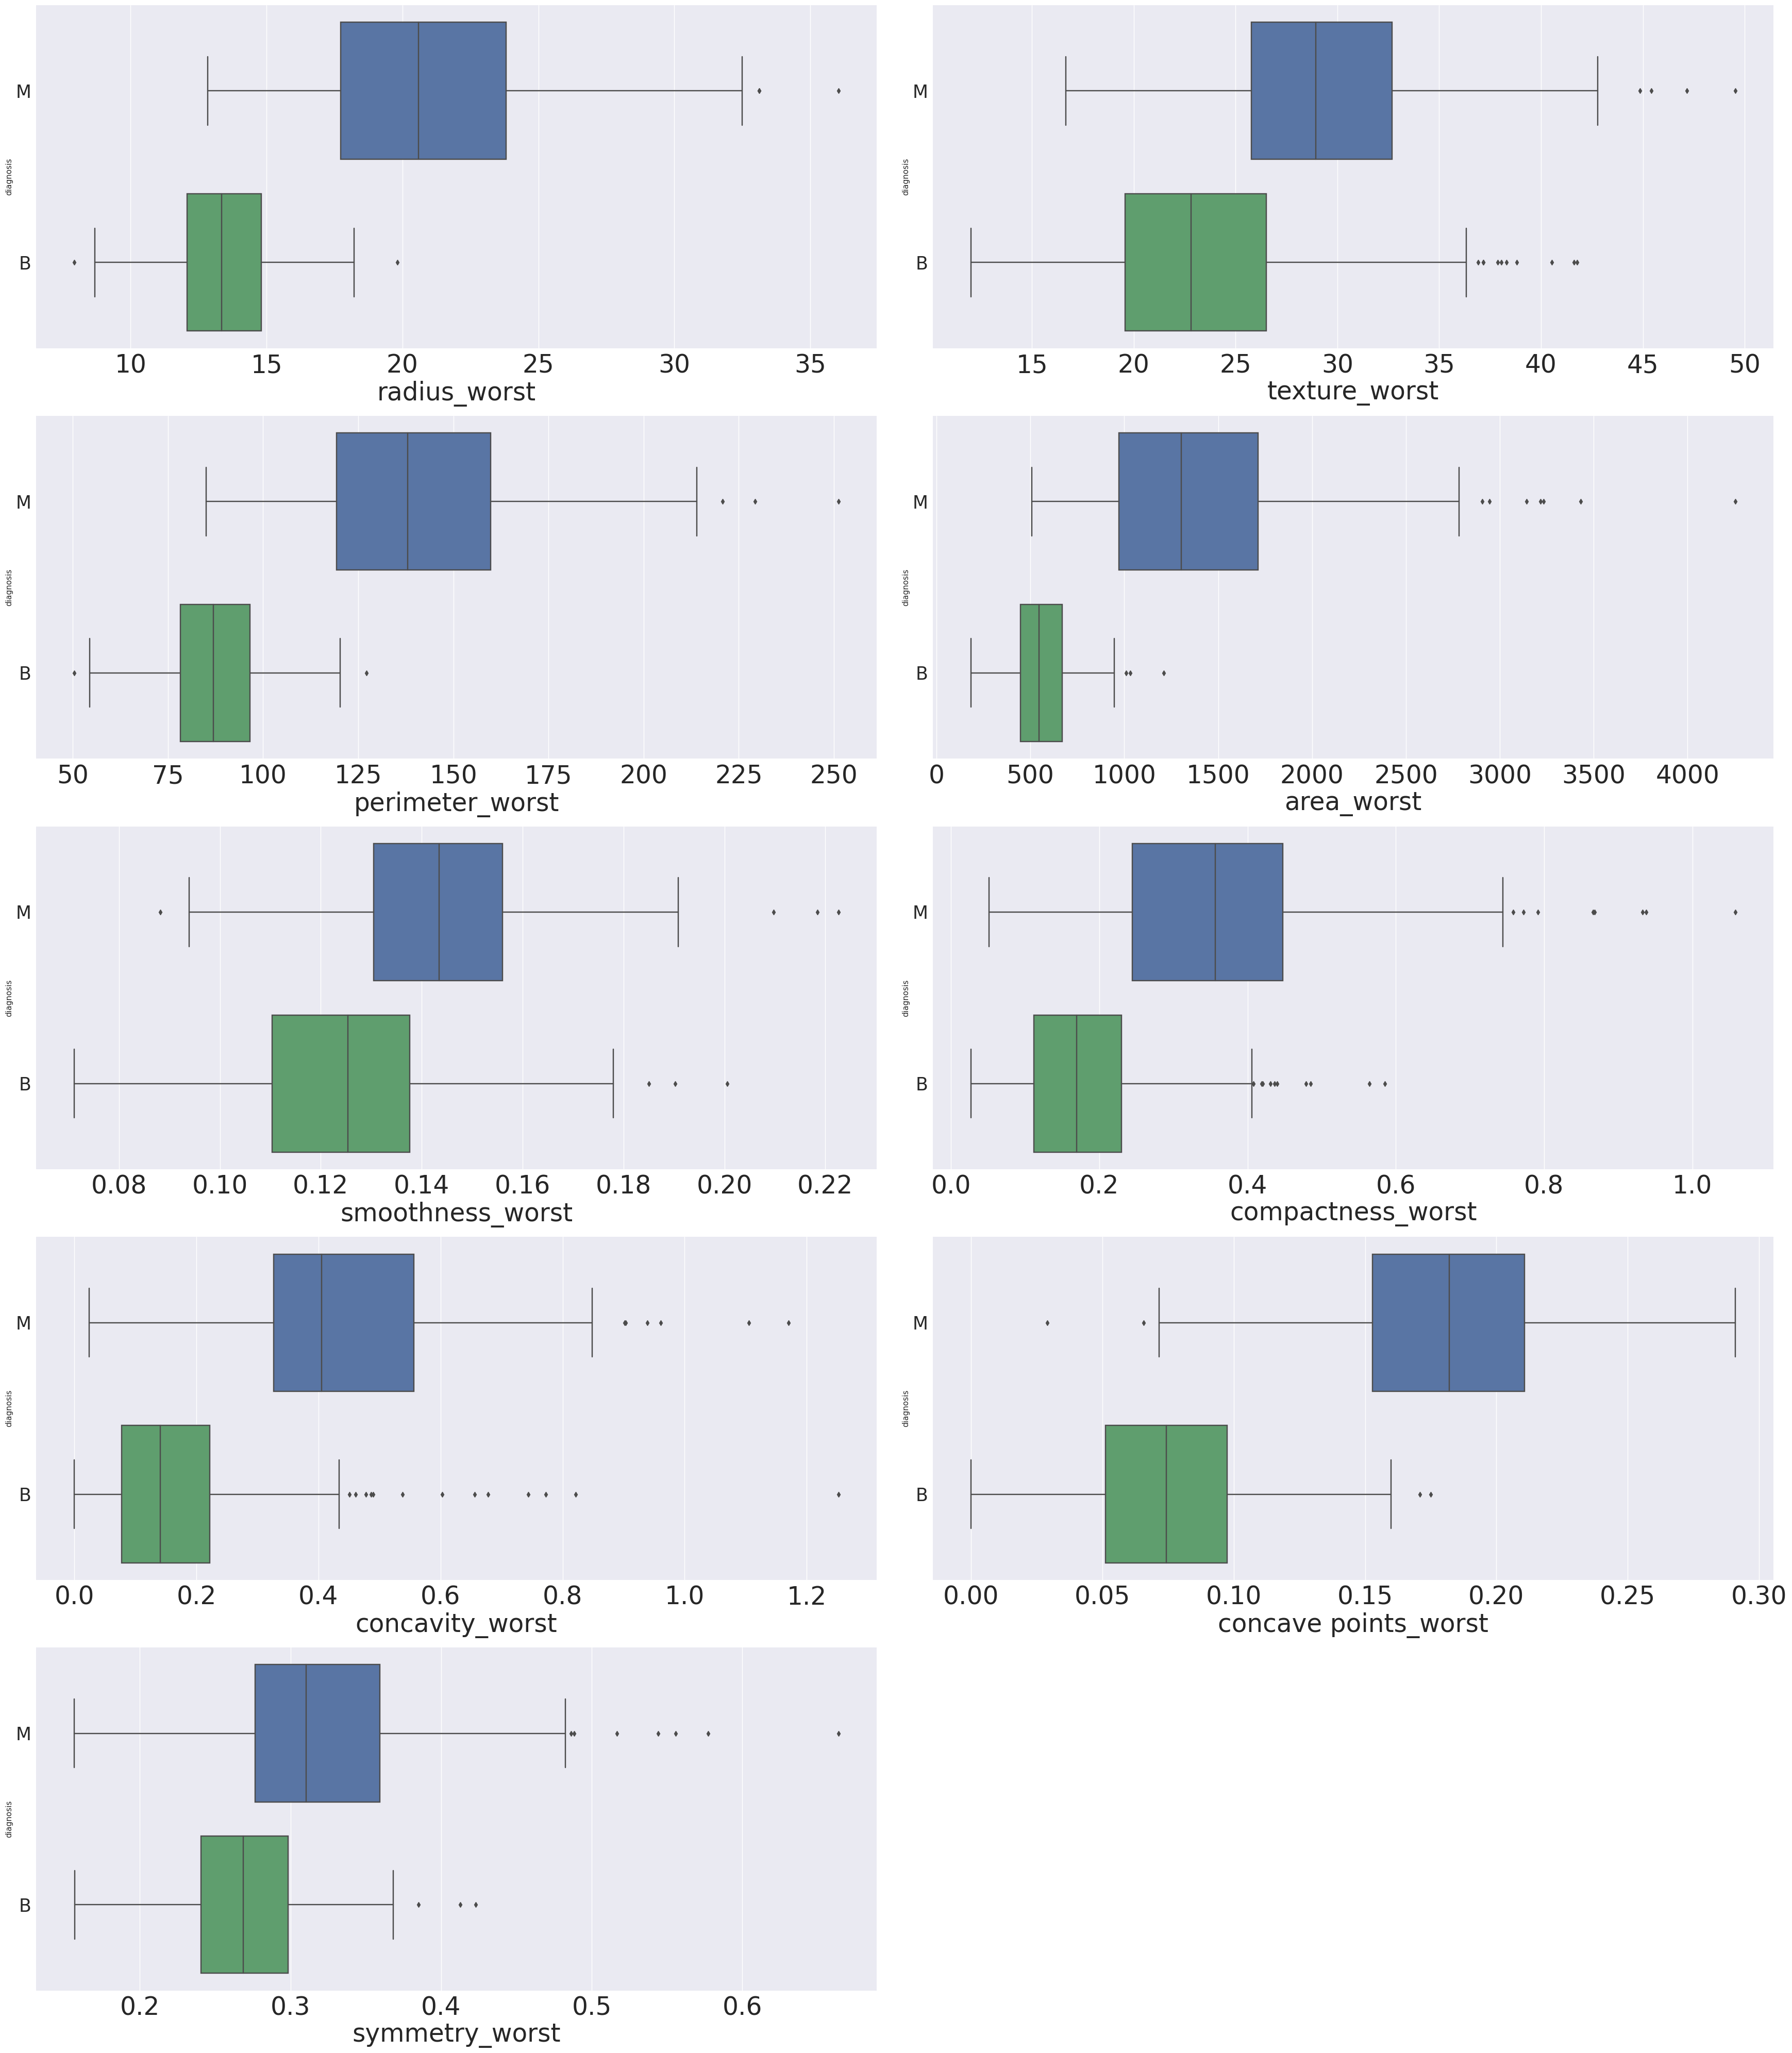

In [129]:
fig,axs = plt.subplots(ncols =2 ,nrows =5 ,figsize = (35,40),dpi= 100)
axs = axs.flatten()
for i,col in enumerate(df_viz3.drop(columns = 'diagnosis').columns) :
    sns.boxplot(x = col,y='diagnosis',data = df_viz3, ax=axs[i])
    axs[i].set_xlabel(col,fontsize=35)
    axs[i].tick_params(axis= 'x',labelsize = 35)
    axs[i].tick_params(axis= 'y',labelsize = 25)
    
axs[-1].set_visible(False)
plt.tight_layout()
plt.show()

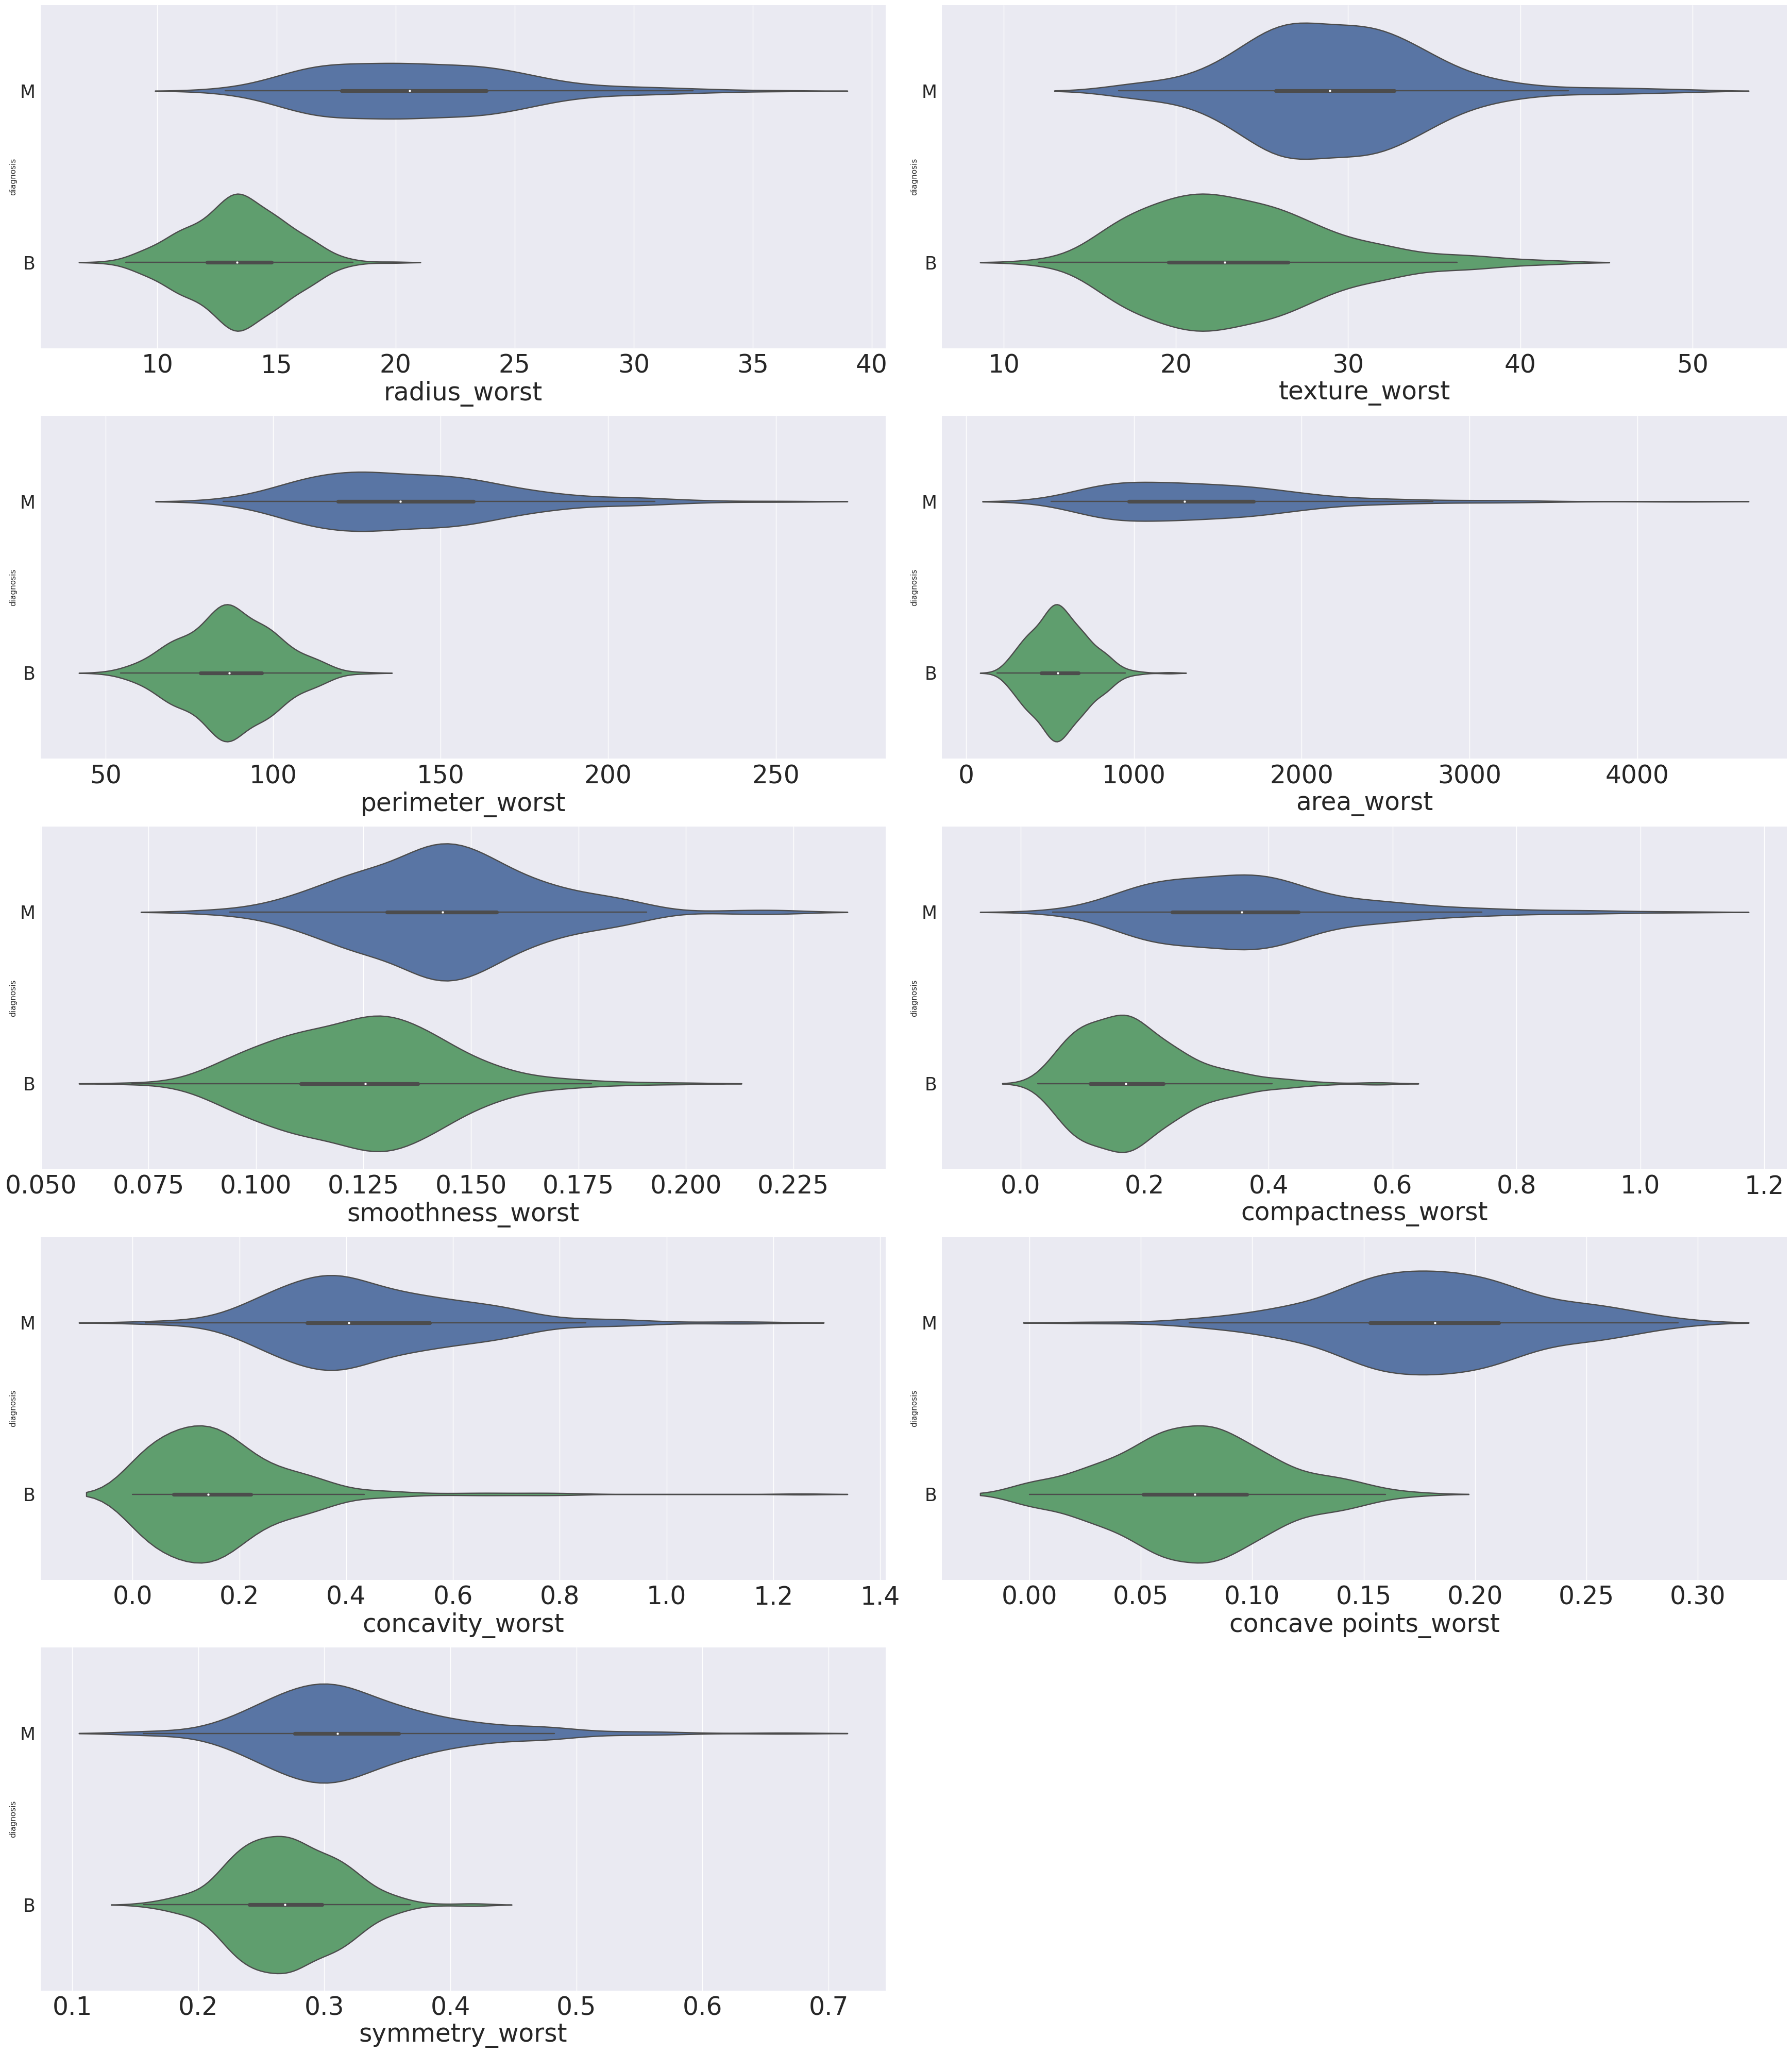

In [130]:
fig,axs = plt.subplots(ncols =2 ,nrows =5 ,figsize = (35,40),dpi= 100)
axs = axs.flatten()
for i,col in enumerate(df_viz3.drop(columns = 'diagnosis').columns) :
    sns.violinplot(x = col,y='diagnosis',data = df_viz3, ax=axs[i])
    axs[i].set_xlabel(col,fontsize=35)
    axs[i].tick_params(axis= 'x',labelsize = 35)
    axs[i].tick_params(axis= 'y',labelsize = 25)
    
axs[-1].set_visible(False)
plt.tight_layout()
plt.show()

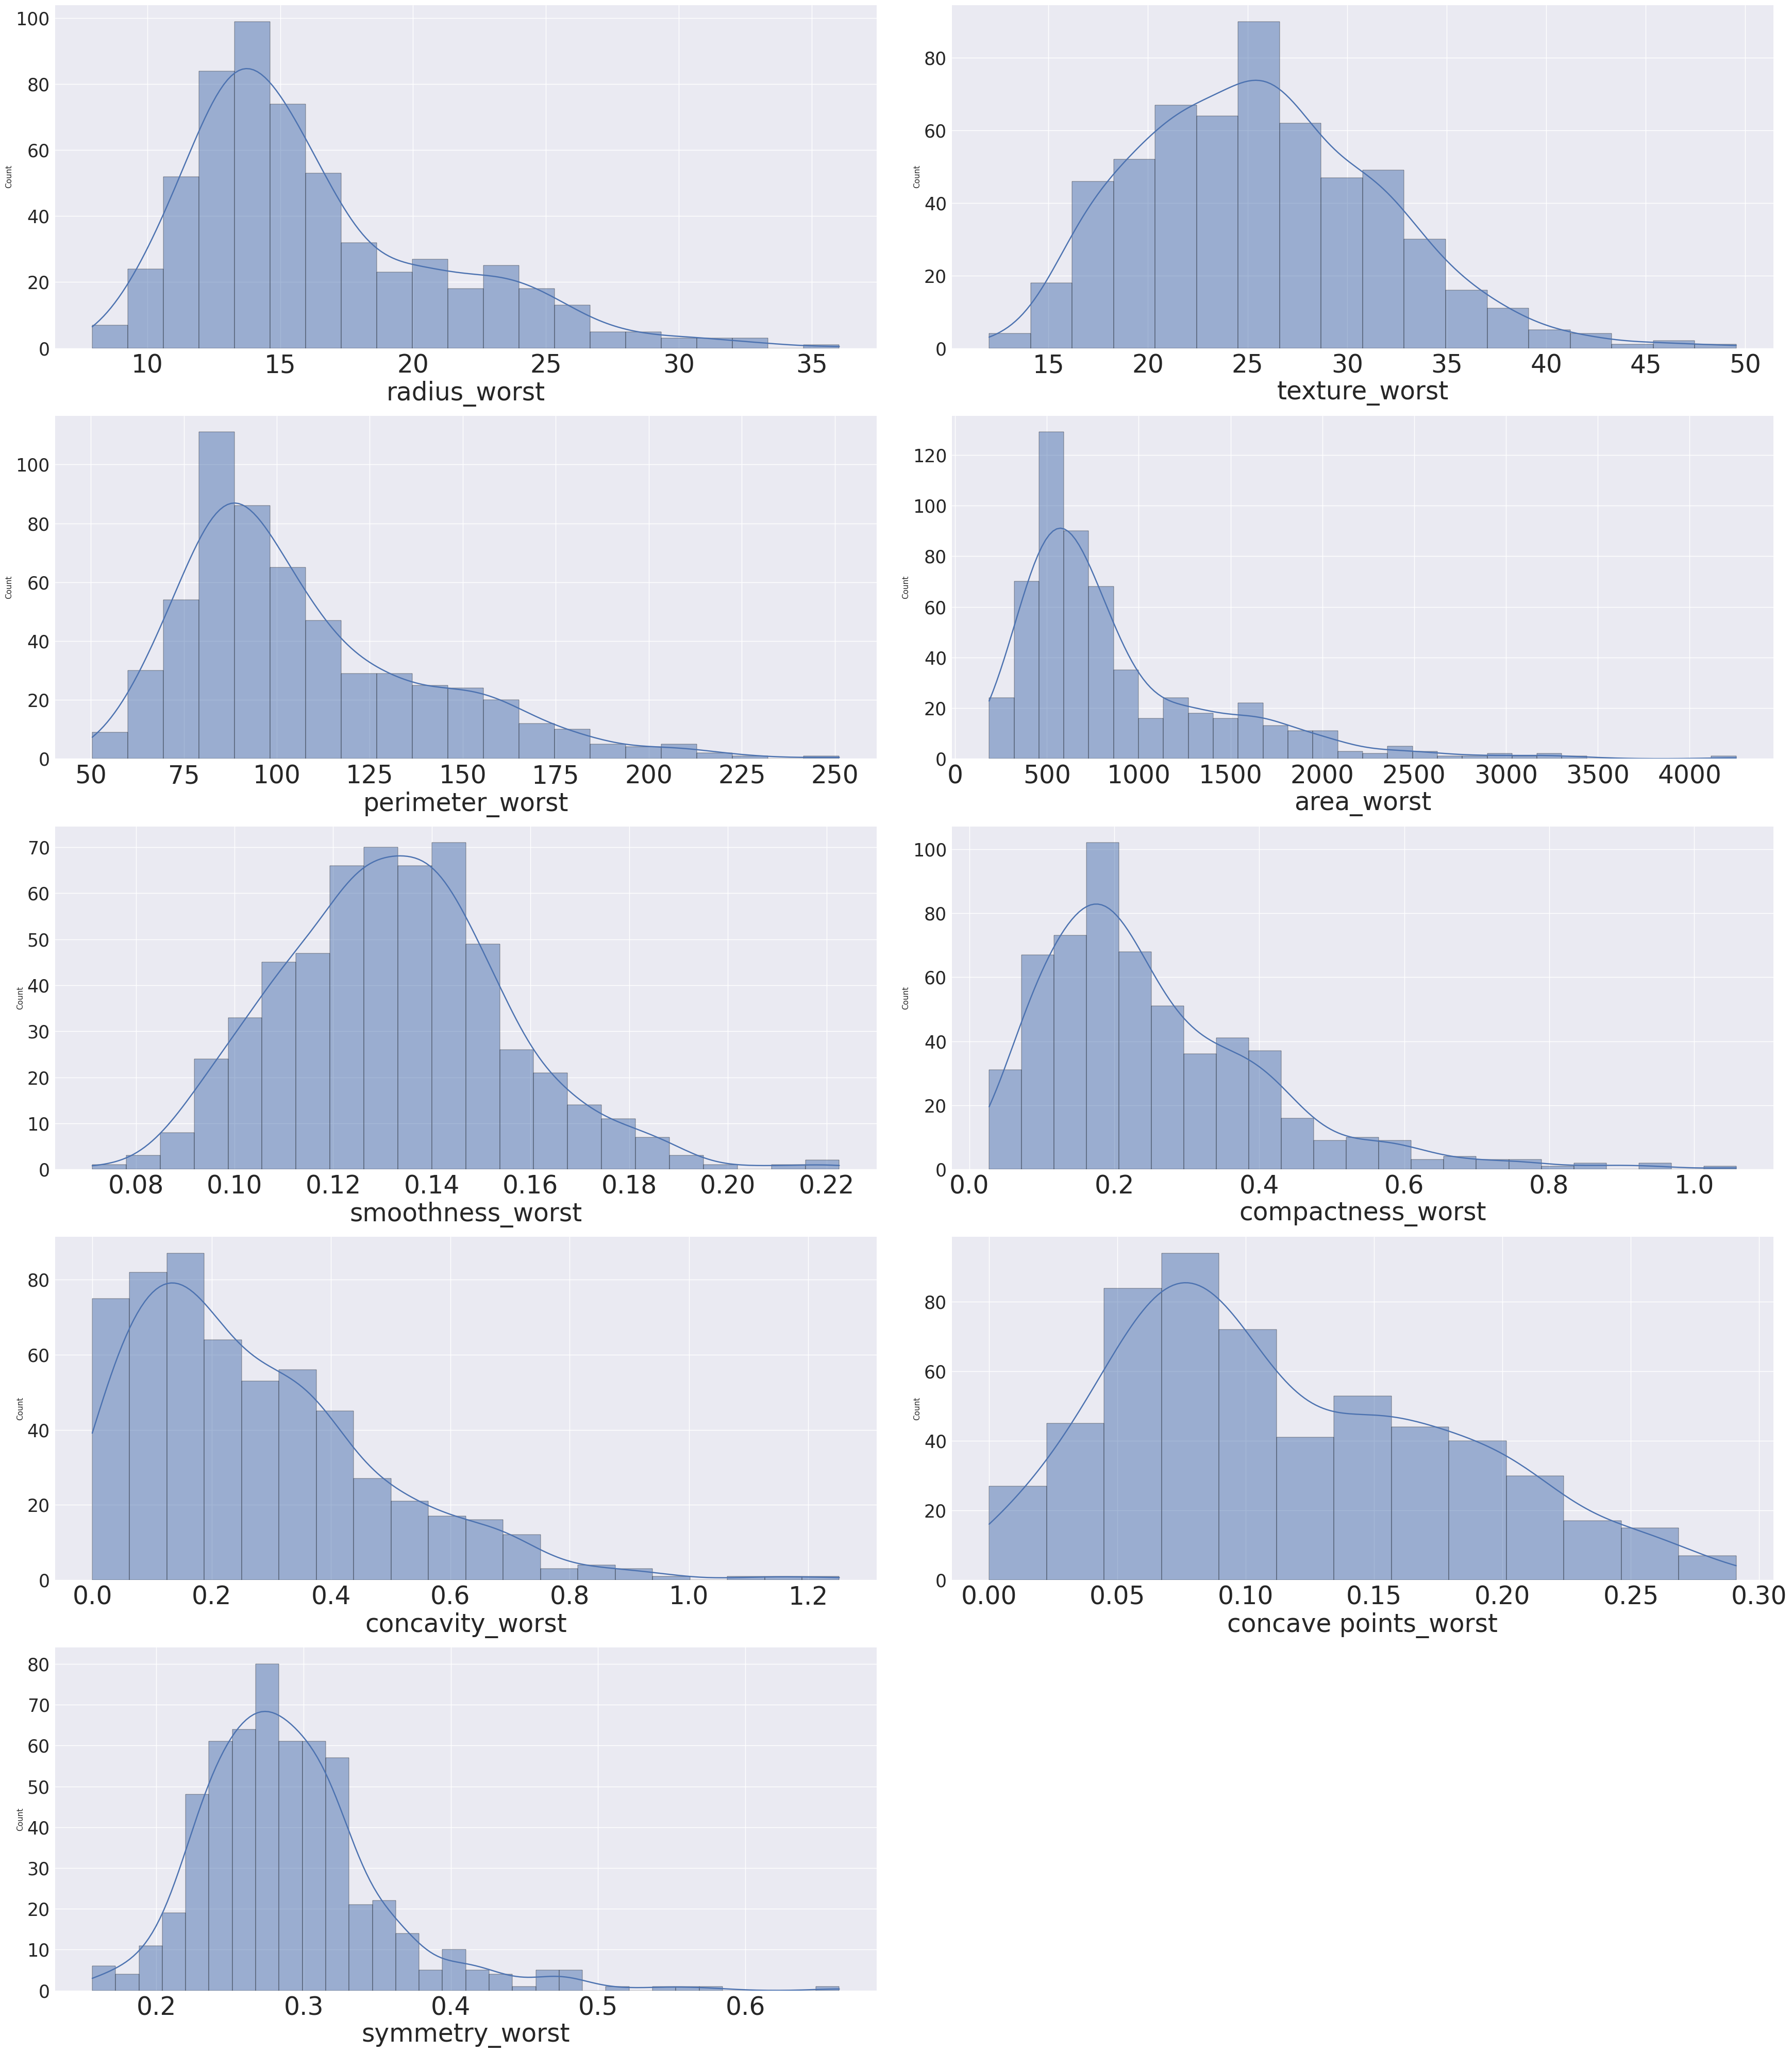

In [131]:
fig,axs = plt.subplots(ncols =2 ,nrows =5 ,figsize = (35,40),dpi= 100)
axs = axs.flatten()
for i,col in enumerate(df_viz3.drop(columns = 'diagnosis').columns) :
    sns.histplot(x = col,data = df_viz3,kde=True, ax=axs[i])
    axs[i].set_xlabel(col,fontsize=35)
    axs[i].tick_params(axis= 'x',labelsize = 35)
    axs[i].tick_params(axis= 'y',labelsize = 25)
    
axs[-1].set_visible(False)
plt.tight_layout()
plt.show()

# Correlation Analysis

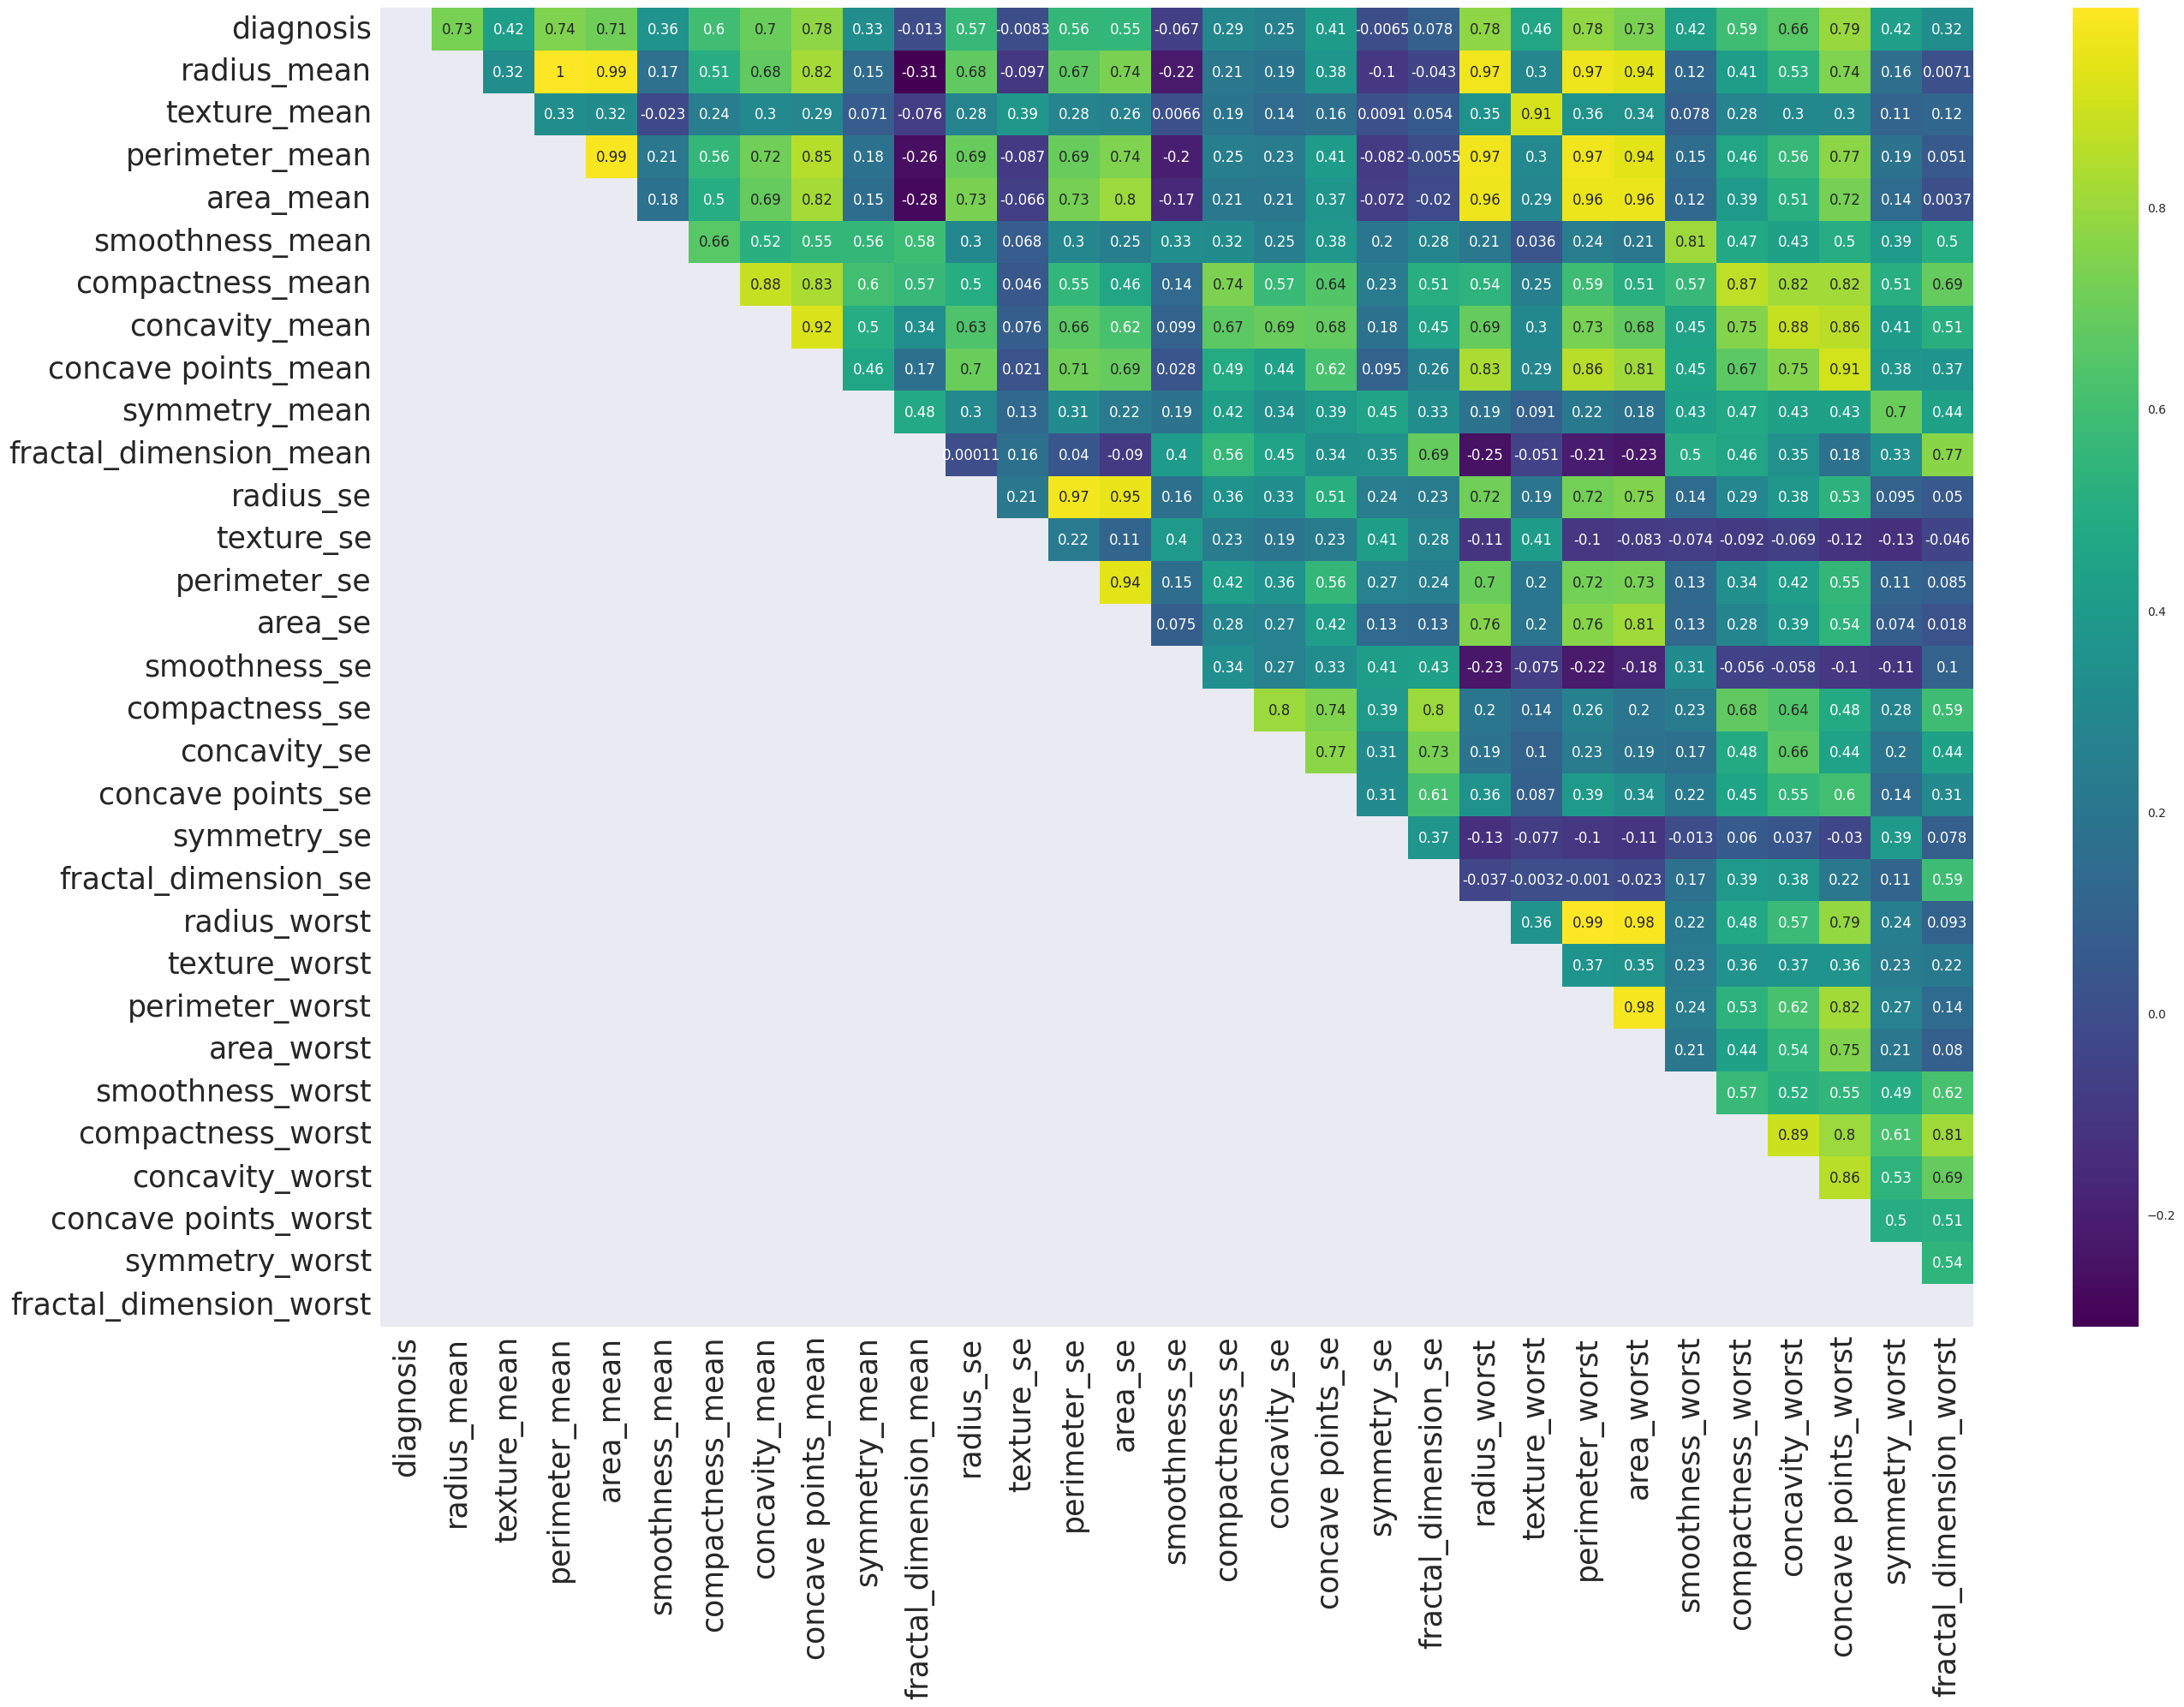

In [135]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(),cmap='viridis',annot=True,mask = np.tril(np.ones_like(df.corr(), dtype=bool)))
plt.xticks(fontsize=25,rotation=90)
plt.yticks(fontsize=25,rotation=0)
plt.show()

# Categotical Target analysis

0    357
1    212
Name: diagnosis, dtype: int64

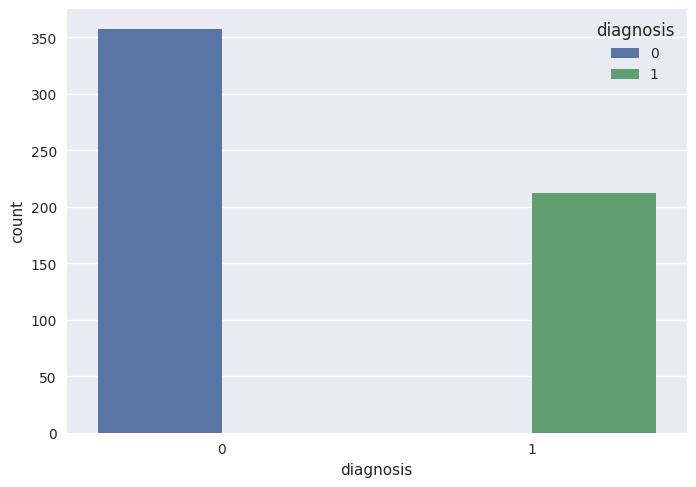

In [136]:
sns.countplot(x='diagnosis',hue='diagnosis',data = df)
df['diagnosis'].value_counts()

# Analysis Explanation before getting to Making Models
**Based on the analysis above we can see that :**

> The data is allready preprocessed

> all the features are continous but the target is discrete(so we can use classificaion algorithms and for naive bayes we can use gaussian)

>all the distributions are normal

> there are no null values that explains the data being preprocessed before

> there are many features but the data samples are low so it gets harder to work on

> the target is unbalanced but we can see that the higher the values the more the chance of cancer type being "MALIGNANT"

> the correlation between most features is high

****So I decide not to change anything in the data and go on making models with the unchanged dataset****

# Normalizing Data
> Malignant  =  1

> Benign  =  0

In [137]:
df['diagnosis'] = df['diagnosis'].replace({'M' : 1 , 'B' : 0})
scaler = preprocessing.StandardScaler()
X = df.drop(columns = 'diagnosis').values
X = scaler.fit_transform(X)
Y = df['diagnosis'].values.reshape(-1,1)
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)


# Roc , Auc and f1 score comparison 


> **I do this to realize which models to better with their default values so I can decide with model to use**

In [138]:
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier

In [139]:
models = [LogisticRegression(random_state=42),KNeighborsClassifier(),
          SVC(probability=True, random_state=42),GaussianNB(),
          DecisionTreeClassifier(random_state=42),RandomForestClassifier(random_state=42),xgb.XGBClassifier(),AdaBoostClassifier()]
model_names = ['LogisticRegression','KNN','SVM','NaiveBayes','DecisionTree','RandomForest','XGBoost','AdaBoostClassifier']
auc_scores = []


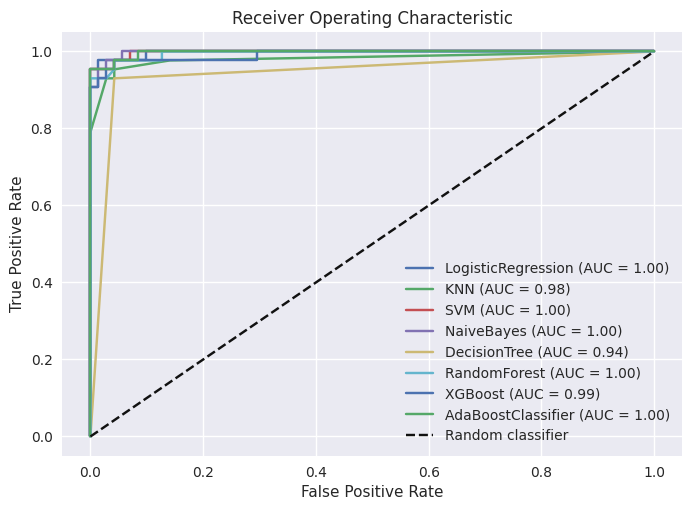

In [140]:
for model,name in zip(models,model_names): 
    model.fit(x_train,y_train)
    y_pred_prob = model.predict_proba(x_test)[:, 1]
    fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)
    auc_score = auc(fpr,tpr)
    auc_scores.append(auc_score)
    plt.plot(fpr, tpr, label='%s (AUC = %0.2f)' % (name, auc_score))
    
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [141]:
from sklearn.metrics import precision_score, recall_score, f1_score
f1_scores = []
recall = []
precision = []

for model, name in zip(models, model_names):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    f1 = f1_score(y_test, y_pred)
    r = recall_score(y_test,y_pred)
    p = precision_score(y_test,y_pred)
    f1_scores.append(f1)
    recall.append(r)
    precision.append(p)
    print('%s: F1-score = %0.3f' % (name, f1))
    print('%s: Precision = %0.3f' % (name, p))
    print('%s: Recall = %0.3f' % (name, r))
    print('\n')
    



average_f1_score = sum(f1_scores) / len(f1_scores)
print('Average F1-score:', average_f1_score)

LogisticRegression: F1-score = 0.965
LogisticRegression: Precision = 0.976
LogisticRegression: Recall = 0.953


KNN: F1-score = 0.930
KNN: Precision = 0.930
KNN: Recall = 0.930


SVM: F1-score = 0.965
SVM: Precision = 0.976
SVM: Recall = 0.953


NaiveBayes: F1-score = 0.952
NaiveBayes: Precision = 0.976
NaiveBayes: Recall = 0.930


DecisionTree: F1-score = 0.930
DecisionTree: Precision = 0.930
DecisionTree: Recall = 0.930


RandomForest: F1-score = 0.952
RandomForest: Precision = 0.976
RandomForest: Recall = 0.930


XGBoost: F1-score = 0.941
XGBoost: Precision = 0.952
XGBoost: Recall = 0.930


AdaBoostClassifier: F1-score = 0.965
AdaBoostClassifier: Precision = 0.976
AdaBoostClassifier: Recall = 0.953


Average F1-score: 0.9500651423360043


> We can see that Logistic Regression , SVM and AdaBoost have the best scores so we continue to make models based on this information 

# Making Models

In [142]:
from sklearn.model_selection import GridSearchCV

SVM = SVC()

C = [0.1,1,10,100]
kernel = ['linear', 'poly', 'rbf', 'sigmoid']

params = {'C':C,'kernel':kernel}

SVM_grid = GridSearchCV(estimator = SVM,param_grid = params,refit= True,verbose = 0,n_jobs=-1)
SVM_grid.fit(x_train,y_train.ravel())
print(f"best parameters : {SVM_grid.best_params_}")
print(f"best score : {SVM_grid.best_score_}")

best parameters : {'C': 0.1, 'kernel': 'linear'}
best score : 0.9758241758241759


In [143]:
LogReg = LogisticRegression(max_iter=10000)

penalty = ['l1','l2','elasticnet']
solver = [ 'newton-cg', 'lbfgs', 'liblinear', 'sag','saga']
C = [0.001, 0.01, 0.1, 1, 10, 100]

params2 = {'C' : C ,'penalty' : penalty , 'solver' : solver }


LogReg_grid = GridSearchCV(estimator = LogReg,param_grid = params2 ,refit= True,verbose = 0,n_jobs=-1)
LogReg_grid.fit(x_train,y_train.ravel())
print(f"best parameters : {LogReg_grid.best_params_}")
print(f"best score : {LogReg_grid.best_score_}")

best parameters : {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
best score : 0.9780219780219781


In [144]:
AdaBoost = AdaBoostClassifier()

estimator = [DecisionTreeClassifier(), SVC(), LogisticRegression(), GaussianNB(), KNeighborsClassifier()]
n_estimators = range(50,500,50)
learning_rate = np.arange(0.1, 1.1, 0.1)
algorithm = ['SAMME','SAMME.R']

params3 = {'estimator': estimator , 'n_estimators' : n_estimators , 'learning_rate' : learning_rate  ,'algorithm' : algorithm }

AdaBoostGrid = GridSearchCV(estimator=AdaBoost , param_grid=params3 , refit= True,verbose = 0,n_jobs=-1 )
AdaBoostGrid.fit(x_train,y_train.ravel())
print(f"best parameters : {AdaBoostGrid.best_params_}")
print(f"best score : {AdaBoostGrid.best_score_}")


best parameters : {'algorithm': 'SAMME.R', 'estimator': LogisticRegression(), 'learning_rate': 0.1, 'n_estimators': 400}
best score : 0.9780219780219781


# The final Model

> As we can see Logistic Regression was the best and most efficient model so we use it as the final model

accuracy  : 0.9912280701754386 

f1 score  : 0.988235294117647 

classification report :
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        71
           1       1.00      0.98      0.99        43

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114
 

The Confusion Matrix : 



0.9912280701754386

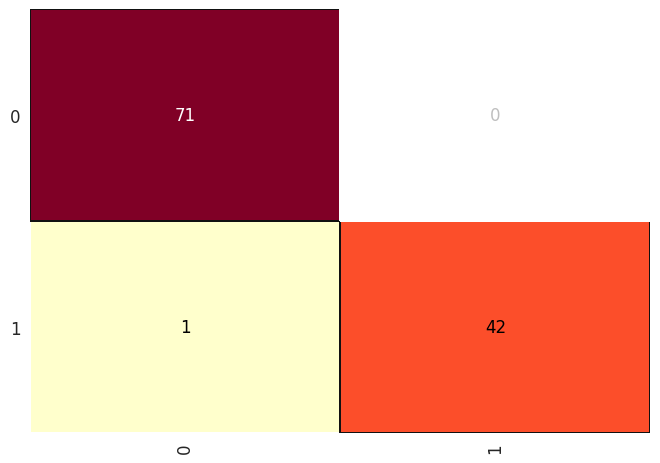

In [145]:
LogReg = LogisticRegression(solver='liblinear' , C = 0.1 , penalty = 'l2')
LogReg.fit(x_train,y_train.ravel())
y_pred = LogReg.predict(x_test)

print(f"accuracy  : {metrics.accuracy_score(y_test,y_pred)} \n")
print(f"f1 score  : {metrics.f1_score(y_test,y_pred)} \n")
print(f"classification report :\n {metrics.classification_report(y_test,y_pred)} \n")
print('The Confusion Matrix : \n')
cm = ConfusionMatrix(LogReg)
cm.fit(x_train,y_train)
cm.score(x_test,y_test)